## REFERÊNCIAS DO GOOGLE

References and influences (these have more in-depth content and explanations):

- [Manipulating Time Series Data in Python](https://www.datacamp.com/courses/manipulating-time-series-data-in-python)
- [Introduction to Time Series Analysis in Python](https://www.datacamp.com/courses/introduction-to-time-series-analysis-in-python)
- [Visualizing Time Series Data in Python](https://www.datacamp.com/courses/visualizing-time-series-data-in-python)
- [VAR models and LSTM](https://www.youtube.com/watch?v=_vQ0W_qXMxk)
- [State space models](https://www.statsmodels.org/dev/statespace.html)
- [Awesome AI-ML-DL: Time-series / anomaly detection](https://github.com/neomatrix369/awesome-ai-ml-dl/tree/master/time-series_anomaly-detection)

Stay tuned for more! And don't forget to upvote and comment.

## ENRIQUECIMENTO:

Para enriquecer seu conjunto de dados da bolsa de valores com informações mensais de taxas de juros, você pode seguir os seguintes passos:

1. **Defina uma Data de Referência Mensal:** Como seus dados de juros são mensais e seus dados da bolsa de valores são diários, você precisará definir uma data de referência mensal para vincular as informações de juros aos dados da bolsa de valores. Por exemplo, você pode escolher o último dia útil de cada mês como sua data de referência.

2. **Calcule Médias Mensais:** Para cada mês, calcule a média das taxas de juros ao longo desse mês. Isso garantirá que você tenha um único valor de taxa de juros para cada mês que pode ser associado aos seus dados diários da bolsa de valores.

3. **Mescla de Dados:** Agora, você pode mesclar os dados de taxa de juros mensais com seus dados diários da bolsa de valores. Para fazer isso, você pode criar uma nova coluna no conjunto de dados da bolsa de valores, onde cada linha terá o valor médio da taxa de juros correspondente ao mês em que os dados da bolsa de valores estão.

Aqui está um exemplo de como você pode fazer isso em Python usando a biblioteca pandas:

```python
import pandas as pd

# Carregue seus dados da bolsa de valores e dados de juros em dois dataframes separados
df_bolsa = pd.read_csv('seu_dataset_da_bolsa.csv')
df_juros = pd.read_csv('seu_dataset_de_juros.csv')

# Converta a coluna de data em formato de data no dataframe da bolsa de valores
df_bolsa['Date'] = pd.to_datetime(df_bolsa['Date'])
df_juros['Date'] = pd.to_datetime(df_juros['Date'])

# Defina a data de referência mensal (último dia de cada mês)
df_bolsa['DataDeReferencia'] = df_bolsa['Date'].dt.to_period('M')

# Calcule a média das taxas de juros para cada mês
df_media_juros = df_juros.groupby('DataDeReferencia')['TaxaDeJuros'].mean().reset_index()

# Mescle os dados da média de juros com os dados da bolsa de valores
df_final = pd.merge(df_bolsa, df_media_juros, on='DataDeReferencia', how='left')

# Agora df_final contém os dados da bolsa de valores enriquecidos com informações de juros mensais
```

Lembre-se de substituir 'seu_dataset_da_bolsa.csv' e 'seu_dataset_de_juros.csv' pelos nomes reais dos seus conjuntos de dados e ajustar os nomes das colunas conforme necessário.


***
# COMEÇO DO TRABALHO
***

# Referências do Trabalho:
***

- [Everything you can do with a time series (stocks)](https://www.kaggle.com/code/neomatrix369/everything-you-can-do-with-a-time-series-stocks#Some-important-things)
- [Dados Históricos do preço do Gold](https://br.investing.com/currencies/xau-usd-historical-data)
- [Previsão de Séries Temporais TensorFlow](https://www.tensorflow.org/tutorials/structured_data/time_series?hl=pt-br)


Não usados para pegar o gold:
- [GC:CMX Historical Data](https://www.nasdaq.com/market-activity/commodities/gc:cmx/historical)
- [GOLD price Today](https://markets.businessinsider.com/commodities/gold-price)

# Tratamento dos dados
***

## Pré-seleção dos dados

Para construção do nosso dataset utilizamos as seguintes empresas do ramo automobilístico:

* Tesla, Inc. - TSLA
* Toyota - TM
* Ford Motor Company - F
* General Motors Company - GM
* Honda Motor Company Ltda. - HMC


### Enriquecimento nos dados
Além disso também decidimos pegar as seguintes informações para enriquecer nosso dataset:

- Valores das ações da petrolífera Exxon Mobil Corp. - ticket "XOM"
- Juros mensais nos Estados Unidos da América (USA)
- Valor de fechamento do Ouro na bolsa estadunidense, com ticket "XAU"

In [ ]:
name_ticket = {"tsla":"Tesla", "tm":"Toyota", "f":"Ford", "gm":"General Motors", "hmc": "Honda", "xom":"Exxon Mobil",
               "xau":"Ouro", "juros":"Juros"}

def ticket_to_name(x):
    return name_ticket[x]

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
plt.style.use('seaborn-v0_8-whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/drive/MyDrive/Stocks .

In [ ]:
!ls

drive  sample_data  Stocks


In [ ]:
!ls Stocks/.

df_mensal.csv  gm.us.txt   juros.csv  tsla.us.txt  xom.us.txt
f.us.txt       hmc.us.txt  tm.us.txt  xau.csv


In [ ]:
path = "Stocks"
files = ["f.us.txt","gm.us.txt","hmc.us.txt", "tm.us.txt", "tsla.us.txt", "xom.us.txt"]

list_df = []
empresas = []
for file in files:
    path_file = f"{path}/{file}"

    df = pd.read_csv(path_file, parse_dates=["Date"])

    nome_empresa = ticket_to_name(file.split(".")[0])
    df["Name"] = nome_empresa
    empresas.append(nome_empresa)
    list_df.append(df)

df = pd.concat(list_df)
df

Date      Open      High       Low     Close    Volume  OpenInt  \
0     1977-01-03   0.44917   0.45687   0.44917   0.44917    557345        0   
1     1977-01-04   0.44917   0.44917   0.43346   0.44131    917108        0   
2     1977-01-05   0.44131   0.44131   0.43346   0.43346    895407        0   
3     1977-01-06   0.43346   0.44131   0.43346   0.44131   1002764        0   
4     1977-01-07   0.44131   0.44131   0.44131   0.44131    597319        0   
...          ...       ...       ...       ...       ...       ...      ...   
12069 2017-11-06  82.53600  83.10100  82.29800  82.98200   9360223        0   
12070 2017-11-07  82.97200  83.05100  82.33800  82.81400   8508720        0   
12071 2017-11-08  82.59600  82.73400  82.10000  82.70500   8771697        0   
12072 2017-11-09  82.53600  83.36800  82.31800  83.20000  10575654        0   
12073 2017-11-10  83.01000  83.08000  82.42000  82.94000   8693290        0   

              Name  
0             Ford  
1             Ford  
2             Ford  
3             Ford  
4             Ford  
...            ...  
12069  Exxon Mobil  
12070  Exxon Mobil  
12071  Exxon Mobil  
12072  Exxon Mobil  
12073  Exxon Mobil  

[32398 rows x 8 columns]

Captando a informação dos juros:

In [ ]:
juros = pd.read_csv(f"{path}/juros.csv", parse_dates= ["TIME"])
juros.head()

LOCATION INDICATOR SUBJECT MEASURE FREQUENCY       TIME     Value Flag Codes
0      AUT       CPI     TOT  AGRWTH         M 2010-11-01  1.851852        NaN
1      AUT       CPI     TOT  AGRWTH         M 2010-12-01  2.310536        NaN
2      AUT       CPI     TOT  AGRWTH         M 2011-01-01  2.502317        NaN
3      AUT       CPI     TOT  AGRWTH         M 2011-02-01  3.021771        NaN
4      AUT       CPI     TOT  AGRWTH         M 2011-03-01  3.092950        NaN

In [ ]:
juros = juros[juros["LOCATION"] == "USA"][["TIME", "Value"]] #Pegando só as informações que queremos dos USA e as colunas Time e Value
juros = juros.set_index("TIME") #Definindo as datas como index
juros.columns = ["ValueJuros"] #Renomeando
juros = juros.resample('D').ffill() #Transformando os dados Mensais em Diários e preenchendo com ffill
juros

ValueJuros
TIME                  
2010-11-01    1.143161
2010-11-02    1.143161
2010-11-03    1.143161
2010-11-04    1.143161
2010-11-05    1.143161
...                ...
2023-07-28    3.177780
2023-07-29    3.177780
2023-07-30    3.177780
2023-07-31    3.177780
2023-08-01    3.665112

[4657 rows x 1 columns]

Valor de fechamento do ouro na bolsa:

In [ ]:
ouro = pd.read_csv(f"{path}/xau.csv", parse_dates=["Data"], dayfirst=True)
ouro.head()

Data    Último  Abertura    Máxima    Mínima  Vol.   Var%
0 2017-12-29  1.302,55  1.294,85  1.307,69  1.293,59   NaN  0,60%
1 2017-12-28  1.294,84  1.287,31  1.295,30  1.286,66   NaN  0,58%
2 2017-12-27  1.287,41  1.283,64  1.289,40  1.281,46   NaN  0,32%
3 2017-12-26  1.283,29  1.274,91  1.283,77  1.273,25   NaN  0,63%
4 2017-12-25  1.275,24  1.275,24  1.275,24  1.275,24   NaN  0,02%

In [ ]:
ouro = ouro[["Data", "Último"]]
ouro.columns = ["Date", "CloseOuro"]
ouro = ouro.set_index("Date")
ouro["CloseOuro"] = pd.to_numeric(ouro["CloseOuro"].apply(lambda x: x.replace(".","").replace(",",".")))
ouro.head()

CloseOuro
Date                 
2017-12-29    1302.55
2017-12-28    1294.84
2017-12-27    1287.41
2017-12-26    1283.29
2017-12-25    1275.24

In [ ]:
df1 = df.copy()
df1 = df1.set_index("Date")

sd = '2011-01-01' # Limitando o df1
ed = '2017-12-31'
dates = pd.date_range(sd, ed)
df1 = df1[df1.index.isin(dates)]
df1

Open    High     Low   Close     Volume  OpenInt         Name
Date                                                                       
2011-01-03  13.406  13.641  13.397  13.593   89704902        0         Ford
2011-01-04  13.704  13.917  13.362  13.697  135050210        0         Ford
2011-01-05  13.641  14.256  13.570  14.098  142332977        0         Ford
2011-01-06  14.207  14.413  14.144  14.360  122085597        0         Ford
2011-01-07  14.508  14.508  14.248  14.397  125623205        0         Ford
...            ...     ...     ...     ...        ...      ...          ...
2017-11-06  82.536  83.101  82.298  82.982    9360223        0  Exxon Mobil
2017-11-07  82.972  83.051  82.338  82.814    8508720        0  Exxon Mobil
2017-11-08  82.596  82.734  82.100  82.705    8771697        0  Exxon Mobil
2017-11-09  82.536  83.368  82.318  83.200   10575654        0  Exxon Mobil
2017-11-10  83.010  83.080  82.420  82.940    8693290        0  Exxon Mobil

[10365 rows x 7 columns]

In [ ]:
# Enriquecendo df com informações do Ouro e do Juros usando merge
df1 = df1.merge(ouro[['CloseOuro']], left_index=True, right_index=True, how='left')
df1 = df1.merge(juros[['ValueJuros']], left_index=True, right_index=True, how='left')
df1.ffill() # Pois podemos ter algum dado faltante de Ouro e Juros então vamos empurrar o do dia anterior para frente
df1

Open     High      Low    Close    Volume  OpenInt  \
2011-01-03   13.406   13.641   13.397   13.593  89704902        0   
2011-01-03   31.958   32.540   31.709   31.736  29064357        0   
2011-01-03   38.029   38.363   38.001   38.249    399598        0   
2011-01-03   73.422   74.102   73.422   73.803    427301        0   
2011-01-03   26.840   27.000   25.900   26.620   1282904        0   
...             ...      ...      ...      ...       ...      ...   
2017-11-10   42.140   43.000   42.060   42.660  14099164        0   
2017-11-10   33.000   33.000   32.850   32.930   1053579        0   
2017-11-10  124.800  124.900  124.410  124.490    123151        0   
2017-11-10  302.500  308.360  301.850  302.990   4621912        0   
2017-11-10   83.010   83.080   82.420   82.940   8693290        0   

                      Name  CloseOuro  ValueJuros  
2011-01-03            Ford    1414.30    1.631847  
2011-01-03  General Motors    1414.30    1.631847  
2011-01-03           Honda    1414.30    1.631847  
2011-01-03          Toyota    1414.30    1.631847  
2011-01-03           Tesla    1414.30    1.631847  
...                    ...        ...         ...  
2017-11-10  General Motors    1276.14    2.202583  
2017-11-10           Honda    1276.14    2.202583  
2017-11-10          Toyota    1276.14    2.202583  
2017-11-10           Tesla    1276.14    2.202583  
2017-11-10     Exxon Mobil    1276.14    2.202583  

[10365 rows x 9 columns]

## Dados Enriquecidos com Sucesso

Adicionados os valores do Ouro e do Juros


In [ ]:
df1

Open     High      Low    Close    Volume  OpenInt  \
2011-01-03   13.406   13.641   13.397   13.593  89704902        0   
2011-01-03   31.958   32.540   31.709   31.736  29064357        0   
2011-01-03   38.029   38.363   38.001   38.249    399598        0   
2011-01-03   73.422   74.102   73.422   73.803    427301        0   
2011-01-03   26.840   27.000   25.900   26.620   1282904        0   
...             ...      ...      ...      ...       ...      ...   
2017-11-10   42.140   43.000   42.060   42.660  14099164        0   
2017-11-10   33.000   33.000   32.850   32.930   1053579        0   
2017-11-10  124.800  124.900  124.410  124.490    123151        0   
2017-11-10  302.500  308.360  301.850  302.990   4621912        0   
2017-11-10   83.010   83.080   82.420   82.940   8693290        0   

                      Name  CloseOuro  ValueJuros  
2011-01-03            Ford    1414.30    1.631847  
2011-01-03  General Motors    1414.30    1.631847  
2011-01-03           Honda    1414.30    1.631847  
2011-01-03          Toyota    1414.30    1.631847  
2011-01-03           Tesla    1414.30    1.631847  
...                    ...        ...         ...  
2017-11-10  General Motors    1276.14    2.202583  
2017-11-10           Honda    1276.14    2.202583  
2017-11-10          Toyota    1276.14    2.202583  
2017-11-10           Tesla    1276.14    2.202583  
2017-11-10     Exxon Mobil    1276.14    2.202583  

[10365 rows x 9 columns]

## Adicionando Outras Colunas com Informações

Vamos completar o dataset com as informações de:

- Deltas
    - Total (CLose - Open)
    - Máximo (High - Low)
- Valores da Petrolífera para as empresas de Carro (Exxon Mobil)
    - Adicionando
        - Volume de transações
        - Valor Close da ação
- Porcentagens de mudanças (Shift e Lag)
    - Pocentagens
        - CloseChange = Close/Close.shift()
        - VolumeChange = Volume/Volume.shift()
    - Diferenças entre:
        - ClosePercentOil = Close/Exxon["Close"]
        - VolumePercentOil = Volume/Exxon["Volume"]

In [ ]:
Exxon = df1[df1["Name"] == "Exxon Mobil"]
Exxon = Exxon[["Close", "Volume"]]
Exxon.columns = ["CloseOil", "VolumeOil"]
Exxon.head()

CloseOil  VolumeOil
2011-01-03    60.341   28807445
2011-01-04    60.625   24744869
2011-01-05    60.462   20448359
2011-01-06    60.853   27829692
2011-01-07    61.182   23838996

In [ ]:
df = df1[df1["Name"] != "Exxon Mobil"]
df.head()

Open    High     Low   Close    Volume  OpenInt            Name  \
2011-01-03  13.406  13.641  13.397  13.593  89704902        0            Ford   
2011-01-03  31.958  32.540  31.709  31.736  29064357        0  General Motors   
2011-01-03  38.029  38.363  38.001  38.249    399598        0           Honda   
2011-01-03  73.422  74.102  73.422  73.803    427301        0          Toyota   
2011-01-03  26.840  27.000  25.900  26.620   1282904        0           Tesla   

            CloseOuro  ValueJuros  
2011-01-03     1414.3    1.631847  
2011-01-03     1414.3    1.631847  
2011-01-03     1414.3    1.631847  
2011-01-03     1414.3    1.631847  
2011-01-03     1414.3    1.631847

In [ ]:
# Enriquecendo df com os dados da Exxon (oil)
df = df.merge(Exxon[['CloseOil']], left_index=True, right_index=True, how='left')
df = df.merge(Exxon[['VolumeOil']], left_index=True, right_index=True, how='left')

df

Open     High      Low    Close    Volume  OpenInt  \
2011-01-03   13.406   13.641   13.397   13.593  89704902        0   
2011-01-03   31.958   32.540   31.709   31.736  29064357        0   
2011-01-03   38.029   38.363   38.001   38.249    399598        0   
2011-01-03   73.422   74.102   73.422   73.803    427301        0   
2011-01-03   26.840   27.000   25.900   26.620   1282904        0   
...             ...      ...      ...      ...       ...      ...   
2017-11-10   12.000   12.090   11.980   12.010  35287650        0   
2017-11-10   42.140   43.000   42.060   42.660  14099164        0   
2017-11-10   33.000   33.000   32.850   32.930   1053579        0   
2017-11-10  124.800  124.900  124.410  124.490    123151        0   
2017-11-10  302.500  308.360  301.850  302.990   4621912        0   

                      Name  CloseOuro  ValueJuros  CloseOil  VolumeOil  
2011-01-03            Ford    1414.30    1.631847    60.341   28807445  
2011-01-03  General Motors    1414.30    1.631847    60.341   28807445  
2011-01-03           Honda    1414.30    1.631847    60.341   28807445  
2011-01-03          Toyota    1414.30    1.631847    60.341   28807445  
2011-01-03           Tesla    1414.30    1.631847    60.341   28807445  
...                    ...        ...         ...       ...        ...  
2017-11-10            Ford    1276.14    2.202583    82.940    8693290  
2017-11-10  General Motors    1276.14    2.202583    82.940    8693290  
2017-11-10           Honda    1276.14    2.202583    82.940    8693290  
2017-11-10          Toyota    1276.14    2.202583    82.940    8693290  
2017-11-10           Tesla    1276.14    2.202583    82.940    8693290  

[8637 rows x 11 columns]

In [ ]:
df["VolumePercentOil"] = df["Volume"]/df["VolumeOil"] #Relação entre Volume da ação da empresa pelo Volume da Exxon
df["ClosePercentOil"] = df["Close"]/df["CloseOil"] #Relação entre Close da ação da empresa pela ação da Exxon

df["DeltaMax"] = df["High"] - df["Low"] #Maior diferença no dia
df["DeltaTotal"] = df["Close"] - df["Open"] #Delta dia
df.head()

Open    High     Low   Close    Volume  OpenInt            Name  \
2011-01-03  13.406  13.641  13.397  13.593  89704902        0            Ford   
2011-01-03  31.958  32.540  31.709  31.736  29064357        0  General Motors   
2011-01-03  38.029  38.363  38.001  38.249    399598        0           Honda   
2011-01-03  73.422  74.102  73.422  73.803    427301        0          Toyota   
2011-01-03  26.840  27.000  25.900  26.620   1282904        0           Tesla   

            CloseOuro  ValueJuros  CloseOil  VolumeOil  VolumePercentOil  \
2011-01-03     1414.3    1.631847    60.341   28807445          3.113949   
2011-01-03     1414.3    1.631847    60.341   28807445          1.008918   
2011-01-03     1414.3    1.631847    60.341   28807445          0.013871   
2011-01-03     1414.3    1.631847    60.341   28807445          0.014833   
2011-01-03     1414.3    1.631847    60.341   28807445          0.044534   

            ClosePercentOil  DeltaMax  DeltaTotal  
2011-01-03         0.225270     0.244       0.187  
2011-01-03         0.525944     0.831      -0.222  
2011-01-03         0.633881     0.362       0.220  
2011-01-03         1.223099     0.680       0.381  
2011-01-03         0.441159     1.100      -0.220

Vendo como os dados estão agrupados

In [ ]:
group_df = df.groupby("Name")

Name
Ford              Axes(0.125,0.2;0.775x0.68)
General Motors    Axes(0.125,0.2;0.775x0.68)
Honda             Axes(0.125,0.2;0.775x0.68)
Tesla             Axes(0.125,0.2;0.775x0.68)
Toyota            Axes(0.125,0.2;0.775x0.68)
Name: Close, dtype: object

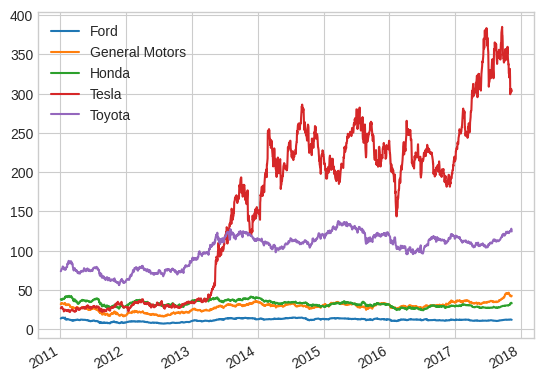

In [ ]:
group_df["Close"].plot(legend=True)

Name
Ford              Axes(0.125,0.2;0.775x0.68)
General Motors    Axes(0.125,0.2;0.775x0.68)
Honda             Axes(0.125,0.2;0.775x0.68)
Tesla             Axes(0.125,0.2;0.775x0.68)
Toyota            Axes(0.125,0.2;0.775x0.68)
Name: Volume, dtype: object

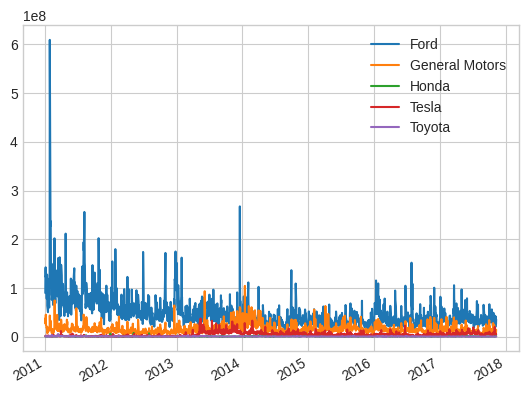

In [ ]:
group_df["Volume"].plot(legend=True)

In [ ]:
df

Open     High      Low    Close    Volume  OpenInt  \
2011-01-03   13.406   13.641   13.397   13.593  89704902        0   
2011-01-03   31.958   32.540   31.709   31.736  29064357        0   
2011-01-03   38.029   38.363   38.001   38.249    399598        0   
2011-01-03   73.422   74.102   73.422   73.803    427301        0   
2011-01-03   26.840   27.000   25.900   26.620   1282904        0   
...             ...      ...      ...      ...       ...      ...   
2017-11-10   12.000   12.090   11.980   12.010  35287650        0   
2017-11-10   42.140   43.000   42.060   42.660  14099164        0   
2017-11-10   33.000   33.000   32.850   32.930   1053579        0   
2017-11-10  124.800  124.900  124.410  124.490    123151        0   
2017-11-10  302.500  308.360  301.850  302.990   4621912        0   

                      Name  CloseOuro  ValueJuros  CloseOil  VolumeOil  \
2011-01-03            Ford    1414.30    1.631847    60.341   28807445   
2011-01-03  General Motors    1414.30    1.631847    60.341   28807445   
2011-01-03           Honda    1414.30    1.631847    60.341   28807445   
2011-01-03          Toyota    1414.30    1.631847    60.341   28807445   
2011-01-03           Tesla    1414.30    1.631847    60.341   28807445   
...                    ...        ...         ...       ...        ...   
2017-11-10            Ford    1276.14    2.202583    82.940    8693290   
2017-11-10  General Motors    1276.14    2.202583    82.940    8693290   
2017-11-10           Honda    1276.14    2.202583    82.940    8693290   
2017-11-10          Toyota    1276.14    2.202583    82.940    8693290   
2017-11-10           Tesla    1276.14    2.202583    82.940    8693290   

            VolumePercentOil  ClosePercentOil  DeltaMax  DeltaTotal  
2011-01-03          3.113949         0.225270     0.244       0.187  
2011-01-03          1.008918         0.525944     0.831      -0.222  
2011-01-03          0.013871         0.633881     0.362       0.220  
2011-01-03          0.014833         1.223099     0.680       0.381  
2011-01-03          0.044534         0.441159     1.100      -0.220  
...                      ...              ...       ...         ...  
2017-11-10          4.059182         0.144803     0.110       0.010  
2017-11-10          1.621844         0.514348     0.940       0.520  
2017-11-10          0.121195         0.397034     0.150      -0.070  
2017-11-10          0.014166         1.500965     0.490      -0.310  
2017-11-10          0.531664         3.653123     6.510       0.490  

[8637 rows x 15 columns]

In [ ]:
# Resample para ter dados mensais
list_df = []

for empresa in df["Name"].unique():
    df_empresa = df[df["Name"] == empresa]
    df_temp = df_empresa.drop("Name", axis = 1).resample('M').mean() #Fazendo a média do mês
    df_temp["Name"] = empresa

    list_df.append(df_temp)

df = pd.concat(list_df)
df.index = df.index.to_period('M').to_timestamp() #o index está no último dia do Mês, colocando como o primeiro dia
df

Open        High         Low       Close        Volume  \
2011-01-01   14.211400   14.369300   13.931650   14.151700  1.323738e+08   
2011-02-01   12.410947   12.533000   12.232579   12.377211  1.207583e+08   
2011-03-01   11.483087   11.633609   11.301826   11.453565  9.232572e+07   
2011-04-01   12.038600   12.168700   11.881550   12.013750  8.814780e+07   
2011-05-01   11.843857   11.943952   11.735286   11.833619  6.622857e+07   
...                ...         ...         ...         ...           ...   
2017-07-01  331.121000  335.358350  322.953950  328.799000  9.059192e+06   
2017-08-01  350.363043  354.955217  345.909435  350.874652  5.899409e+06   
2017-09-01  359.162500  363.471300  353.410050  357.853000  5.565434e+06   
2017-10-01  344.556818  348.993227  340.128227  344.672455  5.582578e+06   
2017-11-01  306.300000  310.157375  300.813750  305.693750  7.962411e+06   

            OpenInt    CloseOuro  ValueJuros   CloseOil     VolumeOil  \
2011-01-01      0.0  1360.664000    1.631847  62.608500  2.770627e+07   
2011-02-01      0.0  1372.923684    2.107585  68.108895  2.880276e+07   
2011-03-01      0.0  1423.332174    2.681603  67.311913  2.360475e+07   
2011-04-01      0.0  1484.161500    3.163631  69.071900  1.911203e+07   
2011-05-01      0.0  1511.161905    3.568646  66.965667  2.367941e+07   
...             ...          ...         ...        ...           ...   
2017-07-01      0.0  1238.224500    1.727978  79.071250  1.023118e+07   
2017-08-01      0.0  1284.327826    1.938974  77.041609  9.809968e+06   
2017-09-01      0.0  1314.369500    2.232964  79.127600  1.086299e+07   
2017-10-01      0.0  1280.907273    2.041129  81.922318  7.898877e+06   
2017-11-01      0.0  1277.506250    2.202583  82.865375  8.780008e+06   

            VolumePercentOil  ClosePercentOil   DeltaMax  DeltaTotal   Name  
2011-01-01          4.643014         0.226211   0.437650   -0.059700   Ford  
2011-02-01          4.433889         0.181830   0.300421   -0.033737   Ford  
2011-03-01          3.939954         0.170197   0.331783   -0.029522   Ford  
2011-04-01          4.667421         0.173930   0.287150   -0.024850   Ford  
2011-05-01          2.827340         0.176752   0.208667   -0.010238   Ford  
...                      ...              ...        ...         ...    ...  
2017-07-01          0.981596         4.158211  12.404400   -2.322000  Tesla  
2017-08-01          0.617724         4.555785   9.045783    0.511609  Tesla  
2017-09-01          0.544344         4.524085  10.061250   -1.309500  Tesla  
2017-10-01          0.736360         4.208371   8.865000    0.115636  Tesla  
2017-11-01          0.948289         3.689018   9.343625   -0.606250  Tesla  

[415 rows x 15 columns]

In [ ]:
# Quantidade de dados faltantes (Nenhum)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 415 entries, 2011-01-01 to 2017-11-01
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              415 non-null    float64
 1   High              415 non-null    float64
 2   Low               415 non-null    float64
 3   Close             415 non-null    float64
 4   Volume            415 non-null    float64
 5   OpenInt           415 non-null    float64
 6   CloseOuro         415 non-null    float64
 7   ValueJuros        415 non-null    float64
 8   CloseOil          415 non-null    float64
 9   VolumeOil         415 non-null    float64
 10  VolumePercentOil  415 non-null    float64
 11  ClosePercentOil   415 non-null    float64
 12  DeltaMax          415 non-null    float64
 13  DeltaTotal        415 non-null    float64
 14  Name              415 non-null    object 
dtypes: float64(14), object(1)
memory usage: 51.9+ KB


Vamos adicionar as porcentagens de variação do Close e do Volume

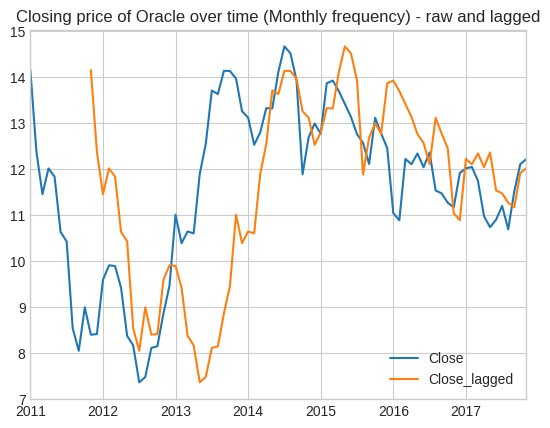

In [ ]:
# Exemplo do shift/lag com a Ford
df1 = df[df["Name"] == "Ford"].copy()


df1["Close"].interpolate().plot(legend=True)
shifted = df1["Close"].interpolate().shift(10).plot(legend=True)
shifted.legend(['Close','Close_lagged'])
plt.title('Closing price of Oracle over time (Monthly frequency) - raw and lagged')
plt.show()

Agora com os dados com a frequência mensal, podemos adicionar o Shift e o Lag

In [ ]:
df["CloseChange"] = df["Close"].div(df["Close"].shift()).sub(1).mul(100)
df["VolumeChange"] = df["Volume"].div(df["Volume"].shift()).sub(1).mul(100)

df.head()

Open       High        Low      Close        Volume  OpenInt  \
2011-01-01  14.211400  14.369300  13.931650  14.151700  1.323738e+08      0.0   
2011-02-01  12.410947  12.533000  12.232579  12.377211  1.207583e+08      0.0   
2011-03-01  11.483087  11.633609  11.301826  11.453565  9.232572e+07      0.0   
2011-04-01  12.038600  12.168700  11.881550  12.013750  8.814780e+07      0.0   
2011-05-01  11.843857  11.943952  11.735286  11.833619  6.622857e+07      0.0   

              CloseOuro  ValueJuros   CloseOil     VolumeOil  \
2011-01-01  1360.664000    1.631847  62.608500  2.770627e+07   
2011-02-01  1372.923684    2.107585  68.108895  2.880276e+07   
2011-03-01  1423.332174    2.681603  67.311913  2.360475e+07   
2011-04-01  1484.161500    3.163631  69.071900  1.911203e+07   
2011-05-01  1511.161905    3.568646  66.965667  2.367941e+07   

            VolumePercentOil  ClosePercentOil  DeltaMax  DeltaTotal  Name  \
2011-01-01          4.643014         0.226211  0.437650   -0.059700  Ford   
2011-02-01          4.433889         0.181830  0.300421   -0.033737  Ford   
2011-03-01          3.939954         0.170197  0.331783   -0.029522  Ford   
2011-04-01          4.667421         0.173930  0.287150   -0.024850  Ford   
2011-05-01          2.827340         0.176752  0.208667   -0.010238  Ford   

            CloseChange  VolumeChange  
2011-01-01          NaN           NaN  
2011-02-01   -12.539055     -8.774776  
2011-03-01    -7.462467    -23.545032  
2011-04-01     4.890921     -4.525192  
2011-05-01    -1.499373    -24.866454

In [ ]:
gp_df = df.groupby("Name")

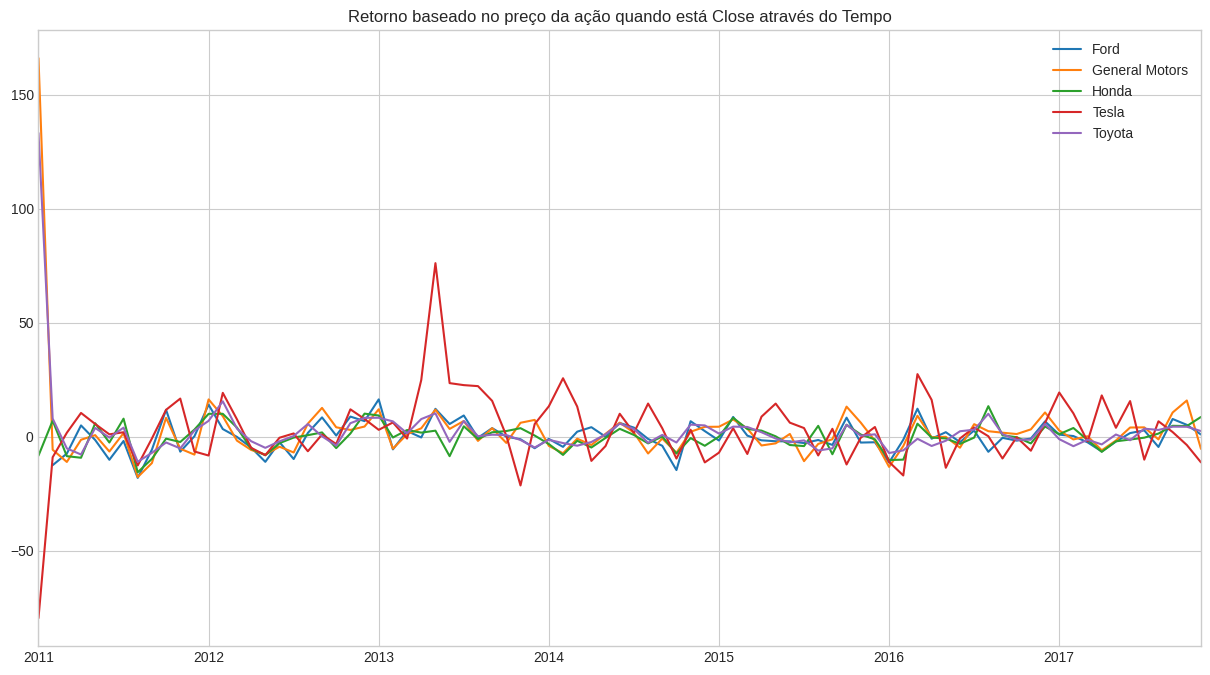

In [ ]:
# Vamos ver como as variações de CloseChange e VolumeChange estão entre as empresas
gp_df["CloseChange"].plot(figsize=(15,8), legend = True)
_ = plt.title("Retorno baseado no preço da ação quando está Close através do Tempo")

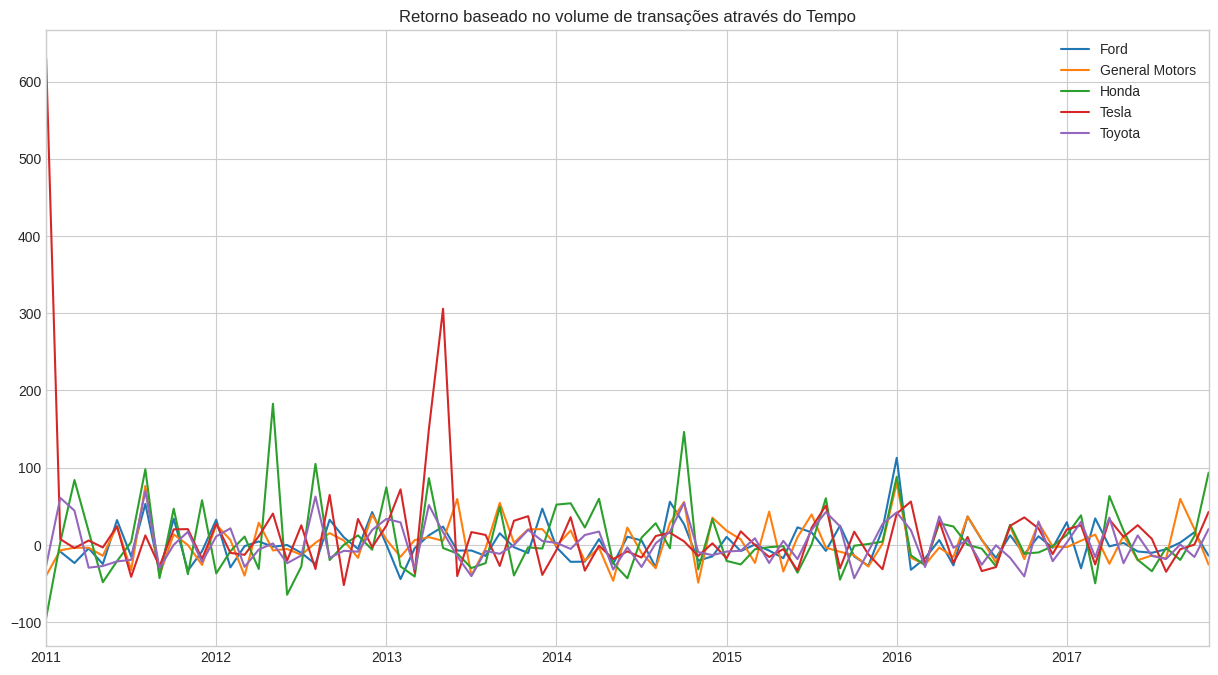

In [ ]:
 # Vamos ver como as variações de CloseChange e VolumeChange estão entre as empresas
gp_df["VolumeChange"].plot(figsize=(15,8), legend = True)
_ = plt.title("Retorno baseado no volume de transações através do Tempo")

In [ ]:
df.to_csv("df_mensal.csv", index = False)

In [ ]:
# Verificando como os dados se comportam
df.describe()

Open        High         Low       Close        Volume  OpenInt  \
count  415.000000  415.000000  415.000000  415.000000  4.150000e+02    415.0   
mean    66.975154   67.712707   66.171705   66.965930  1.415834e+07      0.0   
std     73.791452   74.848952   72.639701   73.772950  2.093957e+07      0.0   
min      7.382833    7.454229    7.290543    7.363824  1.563907e+05      0.0   
25%     24.303181   24.643759   23.876888   24.317962  5.928654e+05      0.0   
50%     32.110500   32.364636   31.789227   32.065227  4.453972e+06      0.0   
75%    103.855042  104.201530  103.374426  103.815105  1.827110e+07      0.0   
max    366.781818  370.936364  359.887000  365.801364  1.323738e+08      0.0   

         CloseOuro  ValueJuros    CloseOil     VolumeOil  VolumePercentOil  \
count   415.000000  415.000000  415.000000  4.150000e+02        415.000000   
mean   1370.609947    1.684761   76.852668  1.617923e+07          0.948896   
std     196.834318    0.963447    7.113398  5.921778e+06          1.256288   
min    1068.626818   -0.199517   59.321333  7.898877e+06          0.014276   
25%    1234.967895    1.063085   71.338000  1.210738e+07          0.037970   
50%    1295.660000    1.664340   77.264909  1.449858e+07          0.314003   
75%    1578.492000    2.162344   82.014421  1.911203e+07          1.391468   
max    1765.521429    3.868357   90.479182  4.111894e+07          5.393414   

       ClosePercentOil    DeltaMax  DeltaTotal  CloseChange  VolumeChange  
count       415.000000  415.000000  415.000000   414.000000    414.000000  
mean          0.857530    1.541002   -0.009224     1.515882      5.666512  
std           0.919969    2.510140    0.383777    13.739790     47.120634  
min           0.101646    0.131374   -2.712857   -79.615652    -94.931039  
25%           0.319469    0.312135   -0.052872    -3.277010    -18.385138  
50%           0.426409    0.601762   -0.007238     0.310214     -1.726594  
75%           1.256105    1.061190    0.055900     4.491008     20.359453  
max           4.572445   12.404400    1.926500   165.956820    630.364412

In [ ]:
# Retirando a coluna OpenInt pois é inteiramente 0
df.drop("OpenInt", axis = 1 ,inplace=True)

In [ ]:
df[df["Name"] == "Ford"]

Open       High        Low      Close        Volume  \
2011-01-01  14.211400  14.369300  13.931650  14.151700  1.323738e+08   
2011-02-01  12.410947  12.533000  12.232579  12.377211  1.207583e+08   
2011-03-01  11.483087  11.633609  11.301826  11.453565  9.232572e+07   
2011-04-01  12.038600  12.168700  11.881550  12.013750  8.814780e+07   
2011-05-01  11.843857  11.943952  11.735286  11.833619  6.622857e+07   
...               ...        ...        ...        ...           ...   
2017-07-01  11.186050  11.280200  11.108050  11.199050  3.545098e+07   
2017-08-01  10.698522  10.776217  10.627435  10.689478  3.341433e+07   
2017-09-01  11.481350  11.574550  11.424550  11.513950  3.440463e+07   
2017-10-01  12.095500  12.188045  12.003045  12.106727  4.001624e+07   
2017-11-01  12.253750  12.308750  12.161900  12.216250  3.437245e+07   

              CloseOuro  ValueJuros   CloseOil     VolumeOil  \
2011-01-01  1360.664000    1.631847  62.608500  2.770627e+07   
2011-02-01  1372.923684    2.107585  68.108895  2.880276e+07   
2011-03-01  1423.332174    2.681603  67.311913  2.360475e+07   
2011-04-01  1484.161500    3.163631  69.071900  1.911203e+07   
2011-05-01  1511.161905    3.568646  66.965667  2.367941e+07   
...                 ...         ...        ...           ...   
2017-07-01  1238.224500    1.727978  79.071250  1.023118e+07   
2017-08-01  1284.327826    1.938974  77.041609  9.809968e+06   
2017-09-01  1314.369500    2.232964  79.127600  1.086299e+07   
2017-10-01  1280.907273    2.041129  81.922318  7.898877e+06   
2017-11-01  1277.506250    2.202583  82.865375  8.780008e+06   

            VolumePercentOil  ClosePercentOil  DeltaMax  DeltaTotal  Name  \
2011-01-01          4.643014         0.226211  0.437650   -0.059700  Ford   
2011-02-01          4.433889         0.181830  0.300421   -0.033737  Ford   
2011-03-01          3.939954         0.170197  0.331783   -0.029522  Ford   
2011-04-01          4.667421         0.173930  0.287150   -0.024850  Ford   
2011-05-01          2.827340         0.176752  0.208667   -0.010238  Ford   
...                      ...              ...       ...         ...   ...   
2017-07-01          3.711984         0.141631  0.172150    0.013000  Ford   
2017-08-01          3.480588         0.138775  0.148783   -0.009043  Ford   
2017-09-01          3.374680         0.145513  0.150000    0.032600  Ford   
2017-10-01          5.393414         0.147791  0.185000    0.011227  Ford   
2017-11-01          4.002346         0.147426  0.146850   -0.037500  Ford   

            CloseChange  VolumeChange  
2011-01-01          NaN           NaN  
2011-02-01   -12.539055     -8.774776  
2011-03-01    -7.462467    -23.545032  
2011-04-01     4.890921     -4.525192  
2011-05-01    -1.499373    -24.866454  
...                 ...           ...  
2017-07-01     2.725586    -10.283191  
2017-08-01    -4.550134     -5.744985  
2017-09-01     7.712928      2.963695  
2017-10-01     5.148340     16.310628  
2017-11-01     0.904644    -14.103735  

[83 rows x 16 columns]

In [ ]:
df.corr('spearman')

<ipython-input-34-33b07348d80f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr('spearman')


Open      High       Low     Close    Volume  CloseOuro  \
Open              1.000000  0.999905  0.999850  0.999947 -0.645336  -0.233726   
High              0.999905  1.000000  0.999620  0.999877 -0.643774  -0.230053   
Low               0.999850  0.999620  1.000000  0.999869 -0.647979  -0.236344   
Close             0.999947  0.999877  0.999869  1.000000 -0.645939  -0.233394   
Volume           -0.645336 -0.643774 -0.647979 -0.645939  1.000000   0.015278   
CloseOuro        -0.233726 -0.230053 -0.236344 -0.233394  0.015278   1.000000   
ValueJuros       -0.155086 -0.152945 -0.156655 -0.155188  0.019376   0.590256   
CloseOil          0.210300  0.207592  0.214805  0.211092 -0.015558  -0.458714   
VolumeOil        -0.193096 -0.189464 -0.198294 -0.193748  0.057900   0.380776   
VolumePercentOil -0.608079 -0.607477 -0.609412 -0.608513  0.967723  -0.077680   
ClosePercentOil   0.977597  0.978368  0.976321  0.977443 -0.651949  -0.172831   
DeltaMax          0.782333  0.787355  0.776133  0.781609 -0.351665  -0.030335   
DeltaTotal        0.084915  0.085268  0.088791  0.089113 -0.074655   0.050187   
CloseChange       0.134226  0.135042  0.136043  0.137199 -0.033701   0.068822   
VolumeChange      0.010296  0.011185  0.007621  0.009675  0.099706  -0.032278   

                  ValueJuros  CloseOil  VolumeOil  VolumePercentOil  \
Open               -0.155086  0.210300  -0.193096         -0.608079   
High               -0.152945  0.207592  -0.189464         -0.607477   
Low                -0.156655  0.214805  -0.198294         -0.609412   
Close              -0.155188  0.211092  -0.193748         -0.608513   
Volume              0.019376 -0.015558   0.057900          0.967723   
CloseOuro           0.590256 -0.458714   0.380776         -0.077680   
ValueJuros          1.000000 -0.271042   0.183829         -0.044950   
CloseOil           -0.271042  1.000000  -0.785313          0.168051   
VolumeOil           0.183829 -0.785313   1.000000         -0.163398   
VolumePercentOil   -0.044950  0.168051  -0.163398          1.000000   
ClosePercentOil    -0.110983  0.055646  -0.066223         -0.646836   
DeltaMax           -0.033079 -0.056588   0.115833         -0.396062   
DeltaTotal          0.011973  0.093224  -0.129637         -0.043987   
CloseChange        -0.017420  0.143103  -0.175230          0.014745   
VolumeChange       -0.010232 -0.006589   0.063252          0.091783   

                  ClosePercentOil  DeltaMax  DeltaTotal  CloseChange  \
Open                     0.977597  0.782333    0.084915     0.134226   
High                     0.978368  0.787355    0.085268     0.135042   
Low                      0.976321  0.776133    0.088791     0.136043   
Close                    0.977443  0.781609    0.089113     0.137199   
Volume                  -0.651949 -0.351665   -0.074655    -0.033701   
CloseOuro               -0.172831 -0.030335    0.050187     0.068822   
ValueJuros              -0.110983 -0.033079    0.011973    -0.017420   
CloseOil                 0.055646 -0.056588    0.093224     0.143103   
VolumeOil               -0.066223  0.115833   -0.129637    -0.175230   
VolumePercentOil        -0.646836 -0.396062   -0.043987     0.014745   
ClosePercentOil          1.000000  0.829203    0.058413     0.102603   
DeltaMax                 0.829203  1.000000   -0.043752     0.044591   
DeltaTotal               0.058413 -0.043752    1.000000     0.530868   
CloseChange              0.102603  0.044591    0.530868     1.000000   
VolumeChange             0.011705  0.115337   -0.117411    -0.063202   

                  VolumeChange  
Open                  0.010296  
High                  0.011185  
Low                   0.007621  
Close                 0.009675  
Volume                0.099706  
CloseOuro            -0.032278  
ValueJuros           -0.010232  
CloseOil             -0.006589  
VolumeOil             0.063252  
VolumePercentOil      0.091783  
ClosePercentOil       0.011705  
DeltaMax              0.115337  
DeltaT

In [ ]:
#Sempre use o group pq é mais fácil
gp_df = df.groupby("Name")

# **Análise Descritiva**

<ipython-input-36-6e6e88542b86>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr('spearman'), annot=True, ax = axes)


<Axes: >

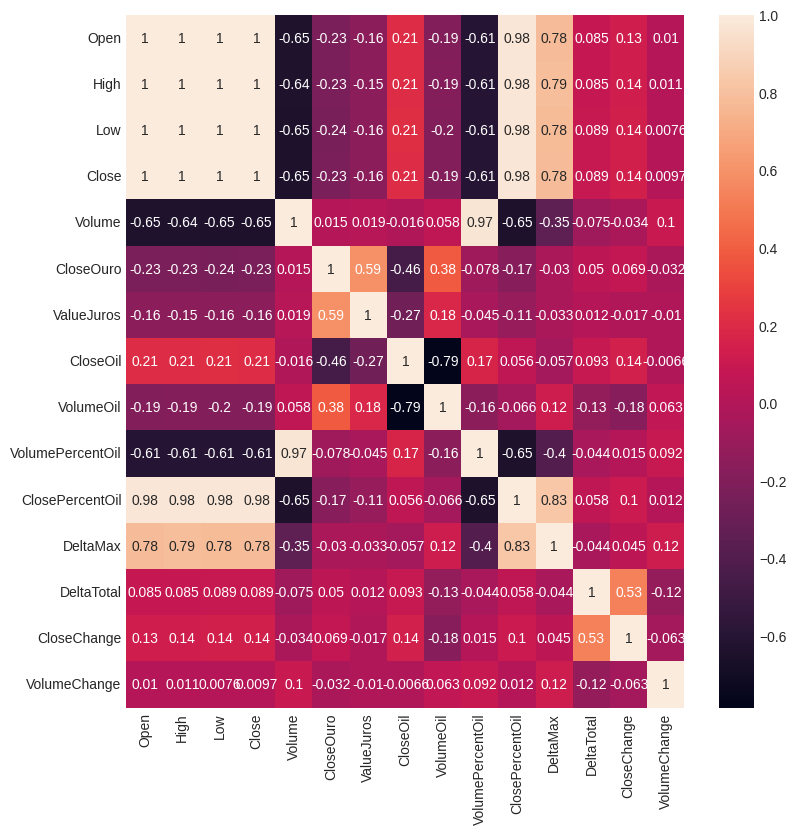

In [ ]:
# Vendo a correlação geral de todas as ações entre si
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,9))
sns.heatmap(df.corr('spearman'), annot=True, ax = axes)

Pela matriz de correlação de todas as empresas juntas, podemos notar que há poucos casos onde há uma correlação positiva significativa para a maioria das colunas independentes em relação as empresas.

Apesar disso parece haver uma correlação positiva significativa entre juros e o volume de petróleo. Assim como o volume das nossas ações com o volume de petróleo também, o que indica que o nosso enriquecimento dos dados ode ajudar nas predições posteriormente.

<Axes: ylabel='Volume'>

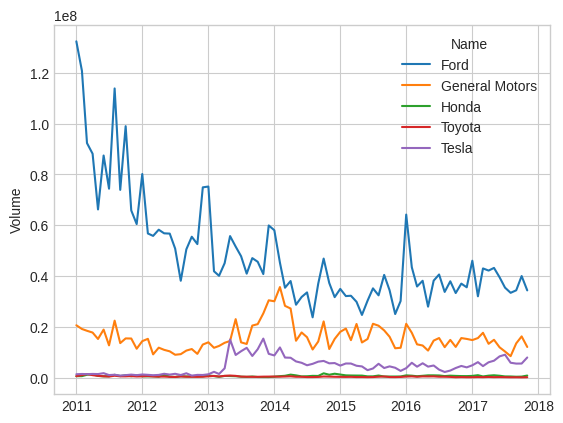

In [ ]:
sns.lineplot(data=df, x = df.index, y = "Volume", hue = "Name", palette="tab10")

A maior queda de volume é da Ford, enquanto que o maior crescimento foi a tesla no início de 2013.

A empresa que mais se manteve estável no quesito volume foi a Toyota e Honda, porém elas também possuem o maior volume, então é possível que aja uma oscilação que não é perceptivel devido a escala do gráfico.

Apesar de alguns picos, General Motors também se manteve relativamente estável.

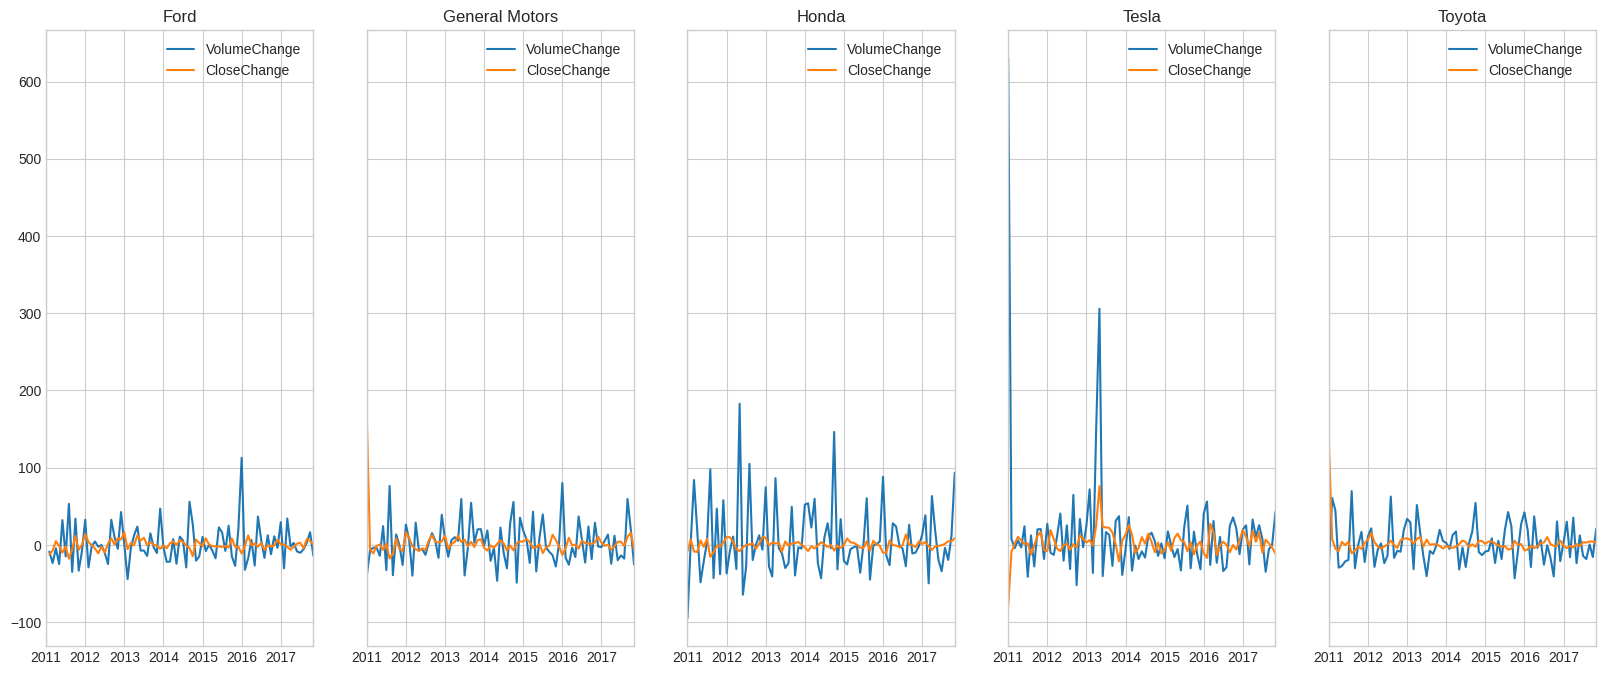

In [ ]:
# Vendo como o VolumeChange e o CloseChange estão se desenvolvendo ao longo do tempo  para cada marca
ncols=5
nrows = int(np.ceil(gp_df.ngroups/ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,8),
                         sharey='row') #para compartilhar os mesmos limites e valores no eixo y

for (key, ax) in zip(gp_df.groups.keys(), axes.flatten()):
    gp_df.get_group(key)[["VolumeChange", "CloseChange"]].plot(ax=ax, title = key)

ax.legend()
plt.show()

 Notamos que nesses gráficos o preço de fechamento tende a ser mais estável do que a mudança de volume de ações para todas as ações. Notamos também uma possível correlação positiva da Tesla em relação ao volume e o valor de fechamento.

<ipython-input-39-033889e5b102>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[df["Name"] == key].corr(), annot=True, ax = ax)


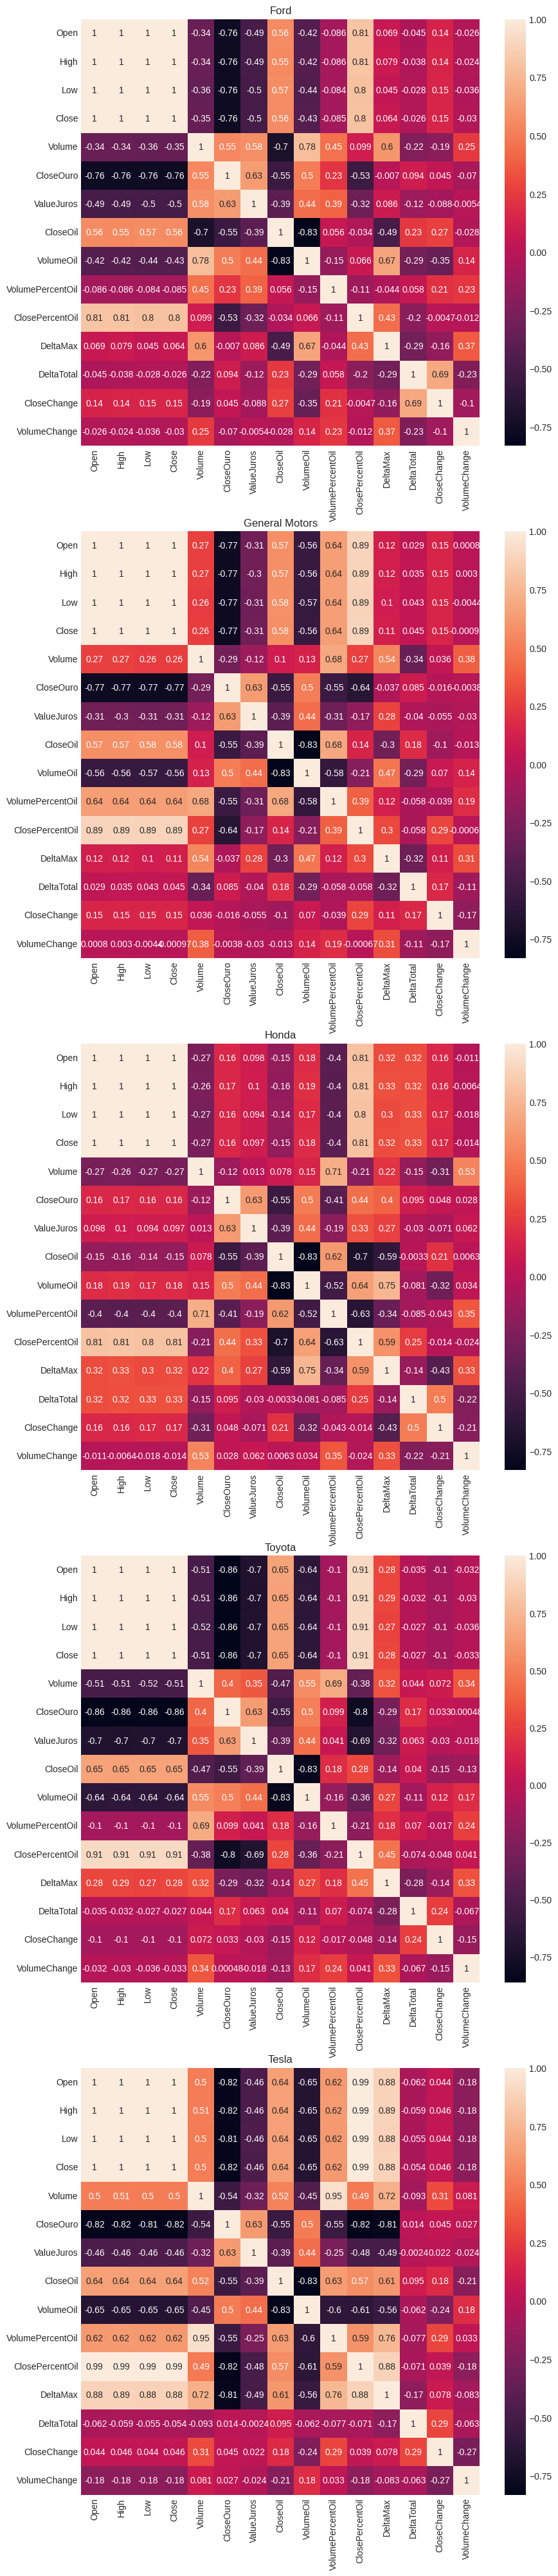

In [ ]:
# Vendo como o VolumeChange e o CloseChange estão se desenvolvendo ao longo do tempo  para cada marca
emprs = df["Name"].unique()

ncols=1
nrows = int(np.ceil(len(emprs)/ncols))
#emprs = ['Ford', 'General Motors', 'Honda', 'Toyota', 'Tesla']
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,nrows*10))

for (key, ax) in zip(empresas, axes.flatten()):
    sns.heatmap(df[df["Name"] == key].corr(), annot=True, ax = ax)
    ax.set_title(key)

ax.legend()
plt.show()

Analisando Indivualmente cada gráfico, não percebemos uma correlação forte entre VolumeChange e CloseChange em nenhuma das empresas.

Algo interessante de se notar é que "ClosePercentOil" possui forte correlação com o maior valor e o valor de abertura de todas as ações.

# Análisando Tendência, Sazonalidade e Resíduo.

Primeiro iremos fazer o Plot do "Close" de todas as empresas que estamos análisando, juntamento com a Tendência, Sazonalidade e Resíduo de cada uma.

**Ford:**

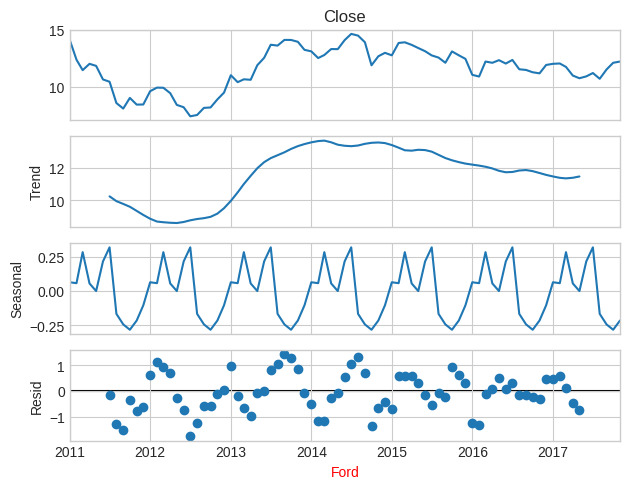

In [ ]:
decomposto_ford_close = sm.tsa.seasonal_decompose(gp_df.get_group("Ford")["Close"])
fig_ford = decomposto_ford_close.plot()
plt.xlabel("Ford", color='red')
plt.show()

**Tesla:**

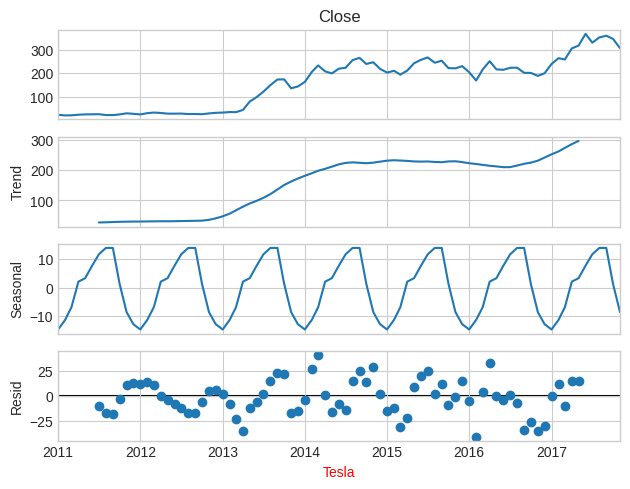

In [ ]:
decomposto_tesla_close = sm.tsa.seasonal_decompose(gp_df.get_group("Tesla")["Close"])
fig_tesla = decomposto_tesla_close.plot()
plt.xlabel("Tesla",color='red')
plt.show()

**General Motors:**

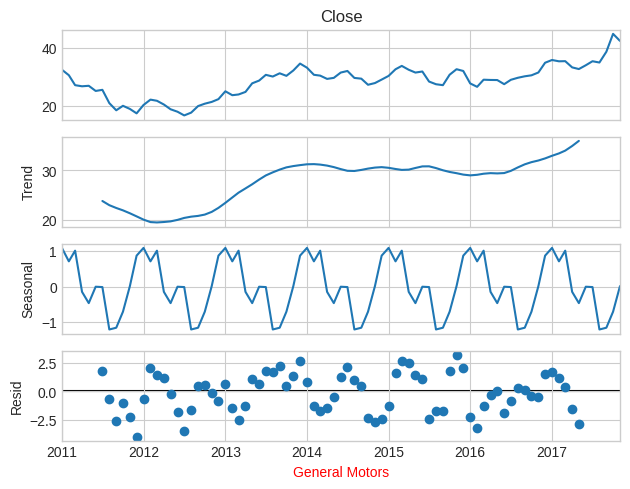

In [ ]:
decomposto_gm_close = sm.tsa.seasonal_decompose(gp_df.get_group("General Motors")["Close"])
fig_gm = decomposto_gm_close.plot()
plt.xlabel("General Motors",color='red')
plt.show()

**Toyota:**

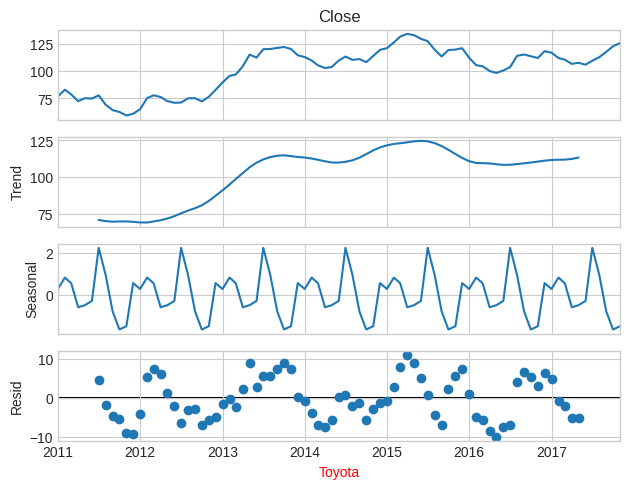

In [ ]:
decomposto_toyota_close = sm.tsa.seasonal_decompose(gp_df.get_group("Toyota")["Close"])
fig_toyota = decomposto_toyota_close.plot()
plt.xlabel("Toyota",color='red')
plt.show()

**Honda:**

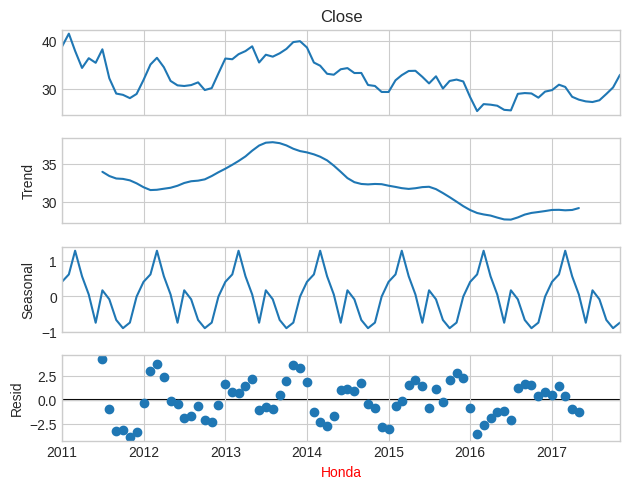

In [ ]:
decomposto_honda_close = sm.tsa.seasonal_decompose(gp_df.get_group("Honda")["Close"])
fig_honda = decomposto_honda_close.plot()
plt.xlabel("Honda",color='red')
plt.show()

**Tendência:**

Nota-se que a tendência de todas as ações é relativamente uniforme, o que indíca que a quantidade de outliers e valores faltantes é baixa.

Tesla, General Motors e Toyota tem um Tendência de crescimento.

Honda possuí decrescimento.

Enquanto que Ford é a única que se mantem em um valor constante, apesar de um crescimento inicial.

**Resíduo:**

O resíduo, que nesse caso é a diferença entre a tendência e o valor observado também possuí uma sazonalidade, algo que não significa muita coisa já que "ruído" é algo natural no contexto de ações.

**Sazonalidade:**

Pela sazonalidade, notamos que todas empresas observadas exceto pela "Tesla" tem 2 picos anuais.

# Autocorrelação

Vamos checar a autocorrelação das empresas. Nos gráficos a seguir, os picos são o quantos cada ação está relacionada com a ação anterior em um intervalo de [-1,1]. A área em azul é o raio de confiança.

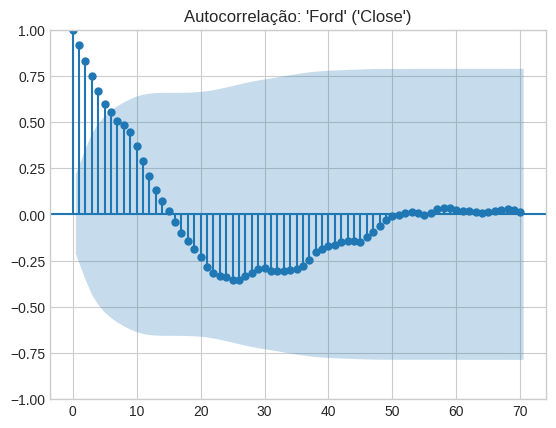

In [ ]:
plot_acf(gp_df.get_group("Ford")["Close"],lags=70,title="Autocorrelação: 'Ford' ('Close')")
plt.show()

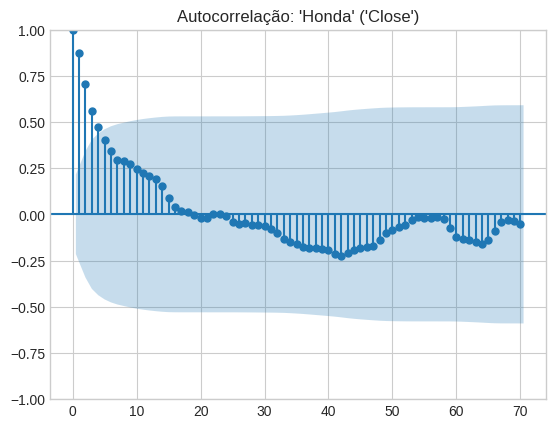

In [ ]:
plot_acf(gp_df.get_group("Honda")["Close"],lags=70,title="Autocorrelação: 'Honda' ('Close')")
plt.show()

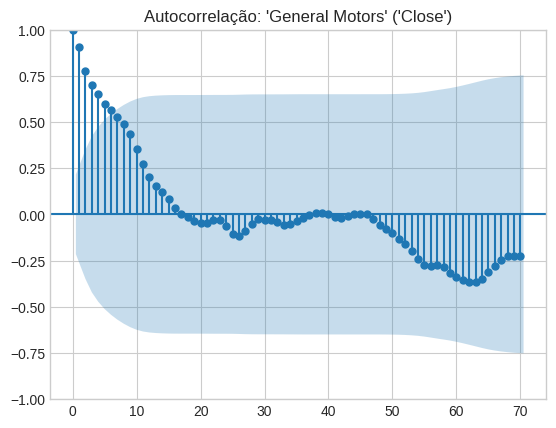

In [ ]:
plot_acf(gp_df.get_group("General Motors")["Close"],lags=70,title="Autocorrelação: 'General Motors' ('Close')")
plt.show()

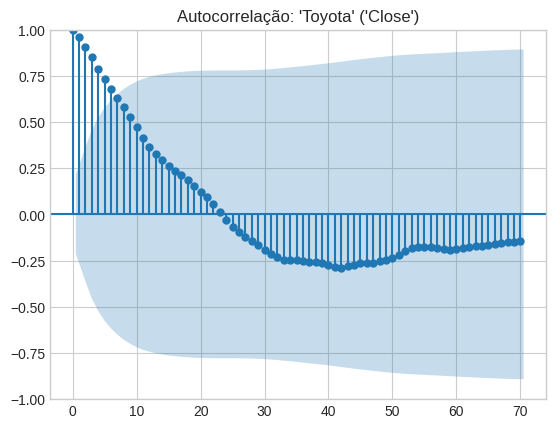

In [ ]:
plot_acf(gp_df.get_group("Toyota")["Close"],lags=70,title="Autocorrelação: 'Toyota' ('Close')")
plt.show()

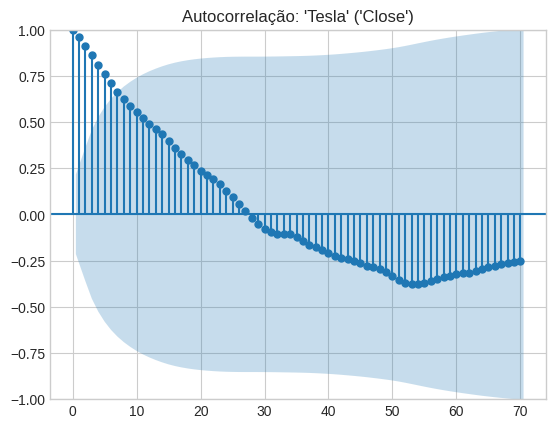

In [ ]:
plot_acf(gp_df.get_group("Tesla")["Close"],lags=70,title="Autocorrelação: 'Tesla' ('Close')")
plt.show()

Podemos notar que para todos os gráficos a autocorrelação, ou seja, o quanto o "Close" de cada empresa está relacionado com "Closes" passados tende a diminuir, e a partir de um certo ponto, se tornar negativa.

Uma autocorrelação com vários valores não nulos indíca que a série não é aleatória. O que significa que para a Ford, a partir do lag 50 ela se torna mais imprevisível, algo que só vale para Ford, pois as outras empresas mantém uma autocorrelação não nula, apesar de que a partir de certo ponto negativa.

Podemos notar também que para todos os gráficos, uma autocorrelação positiva se mantém por vários lags, o que significa que todas as séries são persistentes, ou seja, valores costumam ser influenciados por valores anteriores. O fato de que elas são persisntentes também sugerem que elas sejam não estacionárias.



# Checando se as séries temporais são estácionárias.

**Por quê veriamos checar se é estacionária?**


Uma série temporal estacionária é uma série temporal cujas propriedades estatísticas não mudam com o tempo. Isso significa que a média, a variância e a autocorrelação da série temporal são constantes ao longo do tempo.

As séries temporais não estacionárias são aquelas que apresentam tendências, sazonalidade ou outras características que mudam ao longo do tempo. Essas características podem dificultar a análise de séries temporais e a previsão de valores futuros.

A maioria dos modelos de séries temporais assume que nossa série temporal é estacionária, se ela não for isso significa que não podemos confiar tanto nos resultados dos modelos.

Portanto vamos checar se as ações são estácionárias ou não. Podemos fazer isso usando o teste Augmented Dickey-Fuller (ADF).

O que nos interessa na função é o p-valor, caso p-valor < 0,05 isso significa que que a série é estacionária, caso contrário, ela não é estacionária, vale lembrar que o p-valor ∈[0,1]

Checar se um dataset é estacionário é importante, pois isso significa que os dados dependem de dados anteriores, e só podemos fazer um modelo que usa dados antigos para gerar novos dados. Então um dataset ser estácionário, significa que se fizermos um modelo, poderemos confiar que ele vai gerar previsões confiáveis.

In [ ]:
teste_adf0 = adfuller(gp_df.get_group("Ford")["Close"]) #Realiza o teste
teste_adf1 = adfuller(gp_df.get_group("Honda")["Close"])
teste_adf2 = adfuller(gp_df.get_group("Toyota")["Close"])
teste_adf3 = adfuller(gp_df.get_group("General Motors")["Close"])
teste_adf4 = adfuller(gp_df.get_group("Tesla")["Close"])
print(f"p-valor:\nFord: {teste_adf0[1]}\nHonda: {teste_adf1[1]}\nToyota: {teste_adf2[1]}\nGM: {teste_adf3[1]}\nTesla: {teste_adf4[1]}")# Nos informa o p-valor

p-valor:
Ford: 0.2841071640287949
Honda: 0.014983728247621484
Toyota: 0.6522688733699479
GM: 0.8624388353856408
Tesla: 0.8262376439912175


8.973080059604418e-13


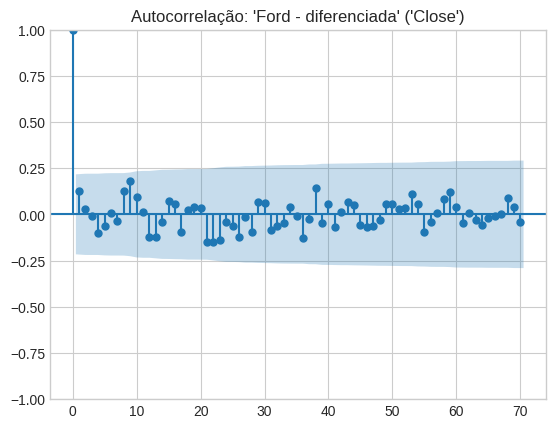

In [ ]:
ford = gp_df.get_group("Ford")["Close"]
ford_diff = ford.diff() #função que diferencia
ford_diff=ford_diff.dropna()#não funciona se tem valores NaN então usamos .dropna() para removelos

print(f"{adfuller(ford_diff)[1]}") #Para sabermos o p-valor
plot_acf(ford_diff,lags=70,title="Autocorrelação: 'Ford - diferenciada' ('Close')")
plt.show()

Usando as ações da Ford como exemplo, percebemos que, após diferenciarmos a correlação se encontra dentro do raio de confiança com valores próximos de zero, o que sugere que agora os dados são estácionários. Como o p-valor se encontra perto de zero podemos concluir que as ações da ford agora são estácionários e que ao usarmos modelos, terão previsões muito mais confiáveis.

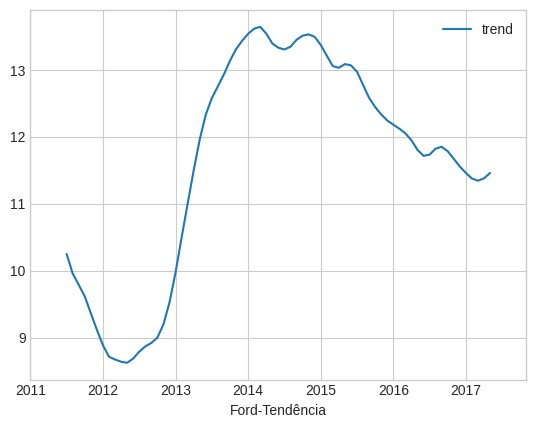

In [ ]:
decomposto_ford_close.trend.plot(legend=True)
plt.xlabel("Ford-Tendência")
plt.show()

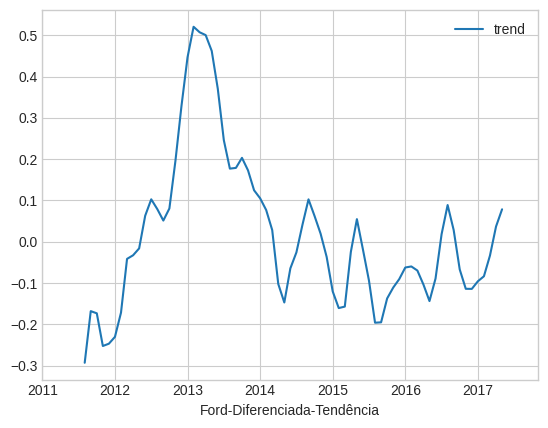

In [ ]:
decomposto_ford_close.trend.diff().plot(legend=True)
plt.xlabel("Ford-Diferenciada-Tendência")
plt.show()

"Plotando" individualmente a tendência da versão antiga e da diferenciada, podemos perceber que na versão diferenciada, não temos uma tendência dos dados, pois eles se mantém oscilando. O que para o nosso modelo é algo bom.

Agora faremos isso para todos os dados, exceto o da Honda, que ja é estácionário.

In [ ]:
toyota = gp_df.get_group("Toyota")["Close"]
toyota_diff = toyota.diff() #função que diferencia
toyota_diff=toyota_diff.dropna()#não funciona se tem valores NaN então usamos .dropna() para removelos

gm = gp_df.get_group("General Motors")["Close"]
gm_diff = gm.diff() #função que diferencia
gm_diff=gm_diff.dropna()#não funciona se tem valores NaN então usamos .dropna() para removelos

tesla = gp_df.get_group("Tesla")["Close"]
tesla_diff = tesla.diff() #função que diferencia
tesla_diff=tesla_diff.dropna()#não funciona se tem valores NaN então usamos .dropna() para removelos

print(f"p-valor:\nFord: {adfuller(ford_diff)[1]}\nHonda: {teste_adf1[1]}\nToyota: {adfuller(toyota_diff)[1]}\nGM: {adfuller(gm_diff)[1]}\nTesla: {adfuller(tesla_diff)[1]}")# Nos informa o p-valor

p-valor:
Ford: 8.973080059604418e-13
Honda: 0.014983728247621484
Toyota: 5.207479394638303e-08
GM: 9.777576659221207e-10
Tesla: 2.9615524623467057e-12


Agora podemos nota que o p-valor para todas empresas é próximo de 0, o que significa que agora todos nossos dados são estacionarios e que podemos trabalhar com eles.

#Validação Cruzada

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, train_test_split, TimeSeriesSplit

In [ ]:
df_new = pd.get_dummies(df, columns=['Name']) #Realiza o one-hot-encoding
df_new = df_new.dropna(subset=['CloseChange','VolumeChange'])# Some com linhas NaN
df_new = pd.DataFrame(MinMaxScaler().fit_transform(df_new), columns = df_new.columns)

df_new.describe()

Open        High         Low       Close      Volume   CloseOuro  \
count  414.000000  414.000000  414.000000  414.000000  414.000000  414.000000   
mean     0.166166    0.166136    0.167351    0.166639    0.113733    0.433361   
std      0.205440    0.206044    0.206134    0.205939    0.166993    0.282786   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.048097    0.048569    0.047405    0.048260    0.003619    0.238689   
50%      0.068813    0.068553    0.069520    0.068919    0.035294    0.325778   
75%      0.268535    0.266254    0.272655    0.269198    0.147990    0.731625   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       ValueJuros    CloseOil   VolumeOil  VolumePercentOil  ClosePercentOil  \
count  414.000000  414.000000  414.000000        414.000000       414.000000   
mean     0.463241    0.563766    0.248419          0.172090         0.169412   
std      0.237128    0.227466    0.177654          0.231370         0.205904   
min      0.000000    0.000000    0.000000          0.000000         0.000000   
25%      0.310384    0.385979    0.126686          0.004402         0.049592   
50%      0.458190    0.575893    0.198666          0.055644         0.072654   
75%      0.580613    0.728327    0.331268          0.254040         0.258467   
max      1.000000    1.000000    1.000000          1.000000         1.000000   

         DeltaMax  DeltaTotal  CloseChange  VolumeChange   Name_Ford  \
count  414.000000  414.000000   414.000000    414.000000  414.000000   
mean     0.115073    0.582787     0.330377      0.138699    0.198068   
std      0.204724    0.082820     0.055950      0.064968    0.399026   
min      0.000000    0.000000     0.000000      0.000000    0.000000   
25%      0.014608    0.573471     0.310860      0.105538    0.000000   
50%      0.038532    0.583193     0.325468      0.128505    0.000000   
75%      0.076314    0.596916     0.342492      0.158957    0.000000   
max      1.000000    1.000000     1.000000      1.000000    1.000000   

       Name_General Motors  Name_Honda  Name_Tesla  Name_Toyota  
count           414.000000  414.000000  414.000000   414.000000  
mean              0.200483    0.200483    0.200483     0.200483  
std               0.400846    0.400846    0.400846     0.400846  
min               0.000000    0.000000    0.000000     0.000000  
25%               0.000000    0.000000    0.000000     0.000000  
50%               0.000000    0.000000    0.000000     0.000000  
75%               0.000000    0.000000    0.000000     0.000000  
max               1.000000    1.000000    1.000000     1.000000

No caso de séries temporais, o meio pelo qual nós faremos validação cruzada é diferente. Teremos que, constantemente dividir os dados de treino e teste, aumentando gradativamente o seu tamanho, assim como também precisamos manter a sequência dos dados, já que eles possuem autocorrelação.

In [ ]:
 # pegando 1 para cada empresa
df_fd = gp_df.get_group("Ford")
df_gm = gp_df.get_group("General Motors")
df_hd = gp_df.get_group("Honda")
df_ty = gp_df.get_group("Toyota")
df_tl = gp_df.get_group("Tesla")
dfs = [df_fd, df_gm, df_hd, df_ty, df_tl]
len(dfs)

5

In [ ]:
dfss = []
for df_emp in dfs:
    df_emp["y"] = df_emp["Close"].shift(-1) # criando a coluna de predição (queremos prever o valor médio do Close do mês seguinte (-1))
    df_emp = df_emp.drop("Name", axis = 1)
    df_emp = df_emp.fillna(method='ffill', axis=0).fillna(method='bfill', axis=0)
    dfss.append(df_emp.iloc[:-1,:])

dfs = dfss[:]
dfs[-1]

<ipython-input-125-b7862788f7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emp["y"] = df_emp["Close"].shift(-1) # criando a coluna de predição (queremos prever o valor médio do Close do mês seguinte (-1))
<ipython-input-125-b7862788f7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emp["y"] = df_emp["Close"].shift(-1) # criando a coluna de predição (queremos prever o valor médio do Close do mês seguinte (-1))
<ipython-input-125-b7862788f7d1>:3: SettingWithCopyWarning: 
A value is trying to 

Open        High         Low       Close        Volume  \
2011-01-01   25.816000   26.177500   25.139500   25.643000  1.376253e+06   
2011-02-01   23.333333   23.797778   22.790000   23.318333  1.478301e+06   
2011-03-01   23.633913   24.069565   23.230435   23.708696  1.415860e+06   
2011-04-01   26.298000   26.723500   25.639500   26.166000  1.495684e+06   
2011-05-01   27.636190   28.120476   26.920476   27.612857  1.445130e+06   
...                ...         ...         ...         ...           ...   
2017-06-01  366.781818  370.936364  359.887000  365.801364  8.415781e+06   
2017-07-01  331.121000  335.358350  322.953950  328.799000  9.059192e+06   
2017-08-01  350.363043  354.955217  345.909435  350.874652  5.899409e+06   
2017-09-01  359.162500  363.471300  353.410050  357.853000  5.565434e+06   
2017-10-01  344.556818  348.993227  340.128227  344.672455  5.582578e+06   

              CloseOuro  ValueJuros   CloseOil     VolumeOil  \
2011-01-01  1360.664000    1.631847  62.608500  2.770627e+07   
2011-02-01  1372.326667    2.107585  68.120944  2.917765e+07   
2011-03-01  1423.332174    2.681603  67.311913  2.360475e+07   
2011-04-01  1484.161500    3.163631  69.071900  1.911203e+07   
2011-05-01  1511.161905    3.568646  66.965667  2.367941e+07   
...                 ...         ...        ...           ...   
2017-06-01  1260.040909    1.633488  79.995727  1.404204e+07   
2017-07-01  1238.224500    1.727978  79.071250  1.023118e+07   
2017-08-01  1284.327826    1.938974  77.041609  9.809968e+06   
2017-09-01  1314.369500    2.232964  79.127600  1.086299e+07   
2017-10-01  1280.907273    2.041129  81.922318  7.898877e+06   

            VolumePercentOil  ClosePercentOil   DeltaMax  DeltaTotal  \
2011-01-01          0.051367         0.410331   1.038000   -0.173000   
2011-02-01          0.057626         0.342464   1.007778   -0.015000   
2011-03-01          0.066164         0.352172   0.839130    0.074783   
2011-04-01          0.079125         0.378734   1.084000   -0.132000   
2011-05-01          0.063790         0.412413   1.200000   -0.023333   
...                      ...              ...        ...         ...   
2017-06-01          0.671806         4.572445  11.049364   -0.980455   
2017-07-01          0.981596         4.158211  12.404400   -2.322000   
2017-08-01          0.617724         4.555785   9.045783    0.511609   
2017-09-01          0.544344         4.524085  10.061250   -1.309500   
2017-10-01          0.736360         4.208371   8.865000    0.115636   

            CloseChange  VolumeChange           y  
2011-01-01   -79.615652    630.364412   23.318333  
2011-02-01    -9.065502      7.414916   23.708696  
2011-03-01     1.674058     -4.223851   26.166000  
2011-04-01    10.364570      5.637859   27.612857  
2011-05-01     5.529531     -3.379989   27.884091  
...                 ...           ...         ...  
2017-06-01    15.570079     25.467756  328.799000  
2017-07-01   -10.115425      7.645291  350.874652  
2017-08-01     6.714027    -34.879306  357.853000  
2017-09-01     1.988844     -5.661149  344.672455  
2017-10-01    -3.683229      0.308031  305.693750  

[82 rows x 16 columns]

Vamos fazer a validação cruzada para séries temporais (*Forecasting*) com 3 folds nos dados.

In [ ]:
folds = 3
tss = TimeSeriesSplit(n_splits=folds, test_size=5)
Trains_index = []
Tests_index = []

# Temos a mesma quantidade de linhas para cada empresa, então vamos fazer um split para todas
for i, (train_index, test_index) in enumerate(tss.split(dfs[-1])):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}\n")

    Trains_index.append(train_index)
    Tests_index.append(test_index)

Fold 0:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66]
  Test:  index=[67 68 69 70 71]

Fold 1:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
  Test:  index=[72 73 74 75 76]

Fold 2:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76]
  Test:  index=[77 78 79 80 81]



# Competição de Modelos

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

Agora, com nossos dados tratados e análizados, poderemos realizar a competição de modelos, optamos por fazer uma comparação usando modelos *Tradicionais* como por exemplo, *Regressão Linear*, *Exemplo*, *Exemplo*, etc. e modelos para *Séries Temporais* como **ARIMA** e **sARIMA**.

Sabemos que os resultados do modelos tradicionais será pior do que os de séries temporais, porém optamos em realizar essa comparação por fins didáticos.

## Modelos Tradicionais

**Regressão Linear:**

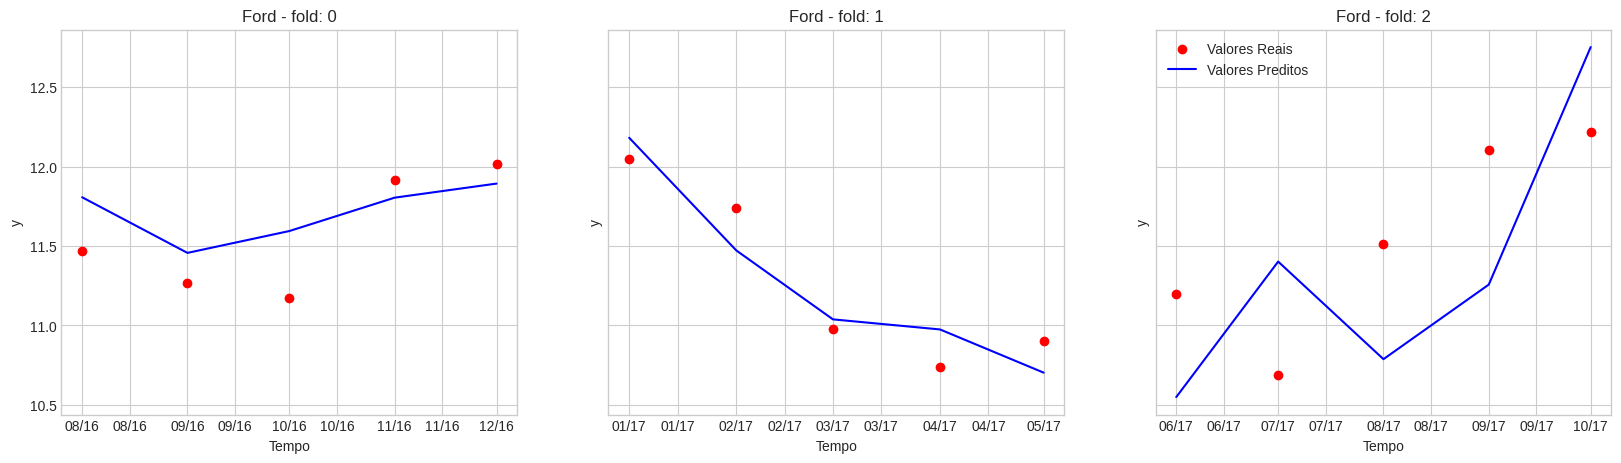

Erros no último Fold


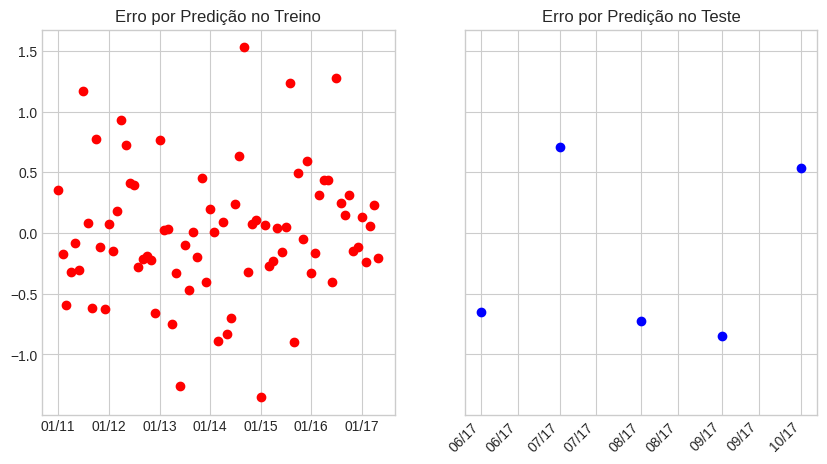

--- Report Ford ---
 r2 médio: 0.2383402694430045
 MAE médio: 0.3709924343083067


     r2 [0.38471884736264705, 0.856168305535959, -0.5258663445695926]
     MAE [0.23643929609010392, 0.1811885282173332, 0.695349478617483]




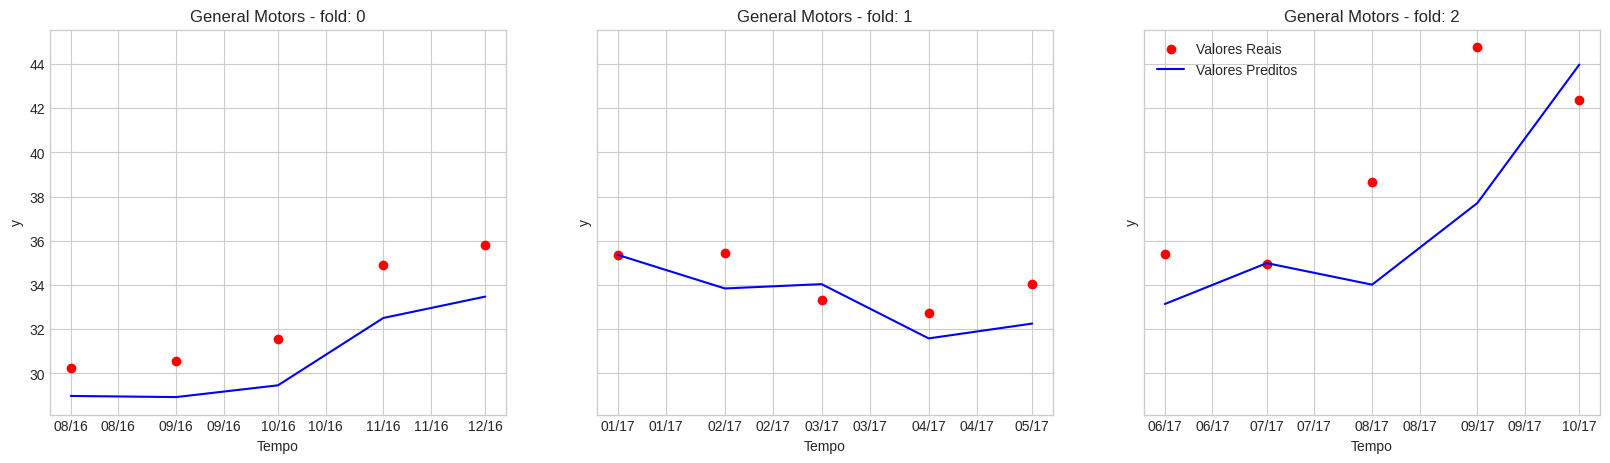

Erros no último Fold


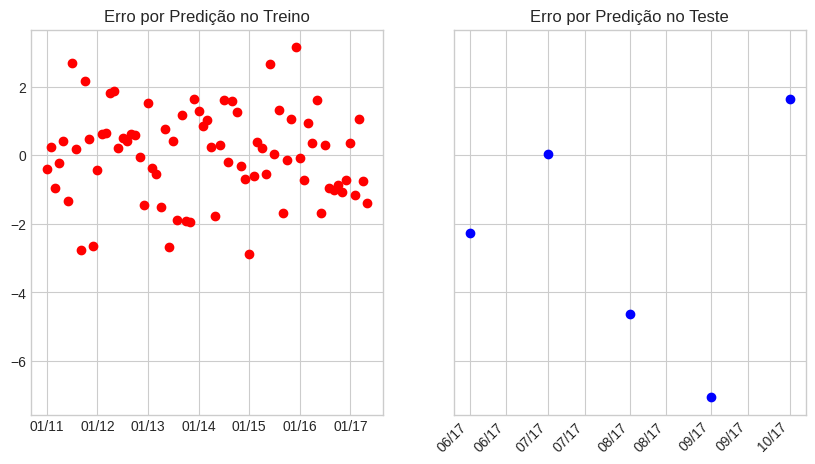

--- Report General Motors ---
 r2 médio: -0.03179149461773275
 MAE médio: 2.038764297187754


     r2 [0.24501176277040493, -0.2678678045881846, -0.07251844203541857]
     MAE [1.9474138048719147, 1.0487446707531554, 3.1201344159381916]




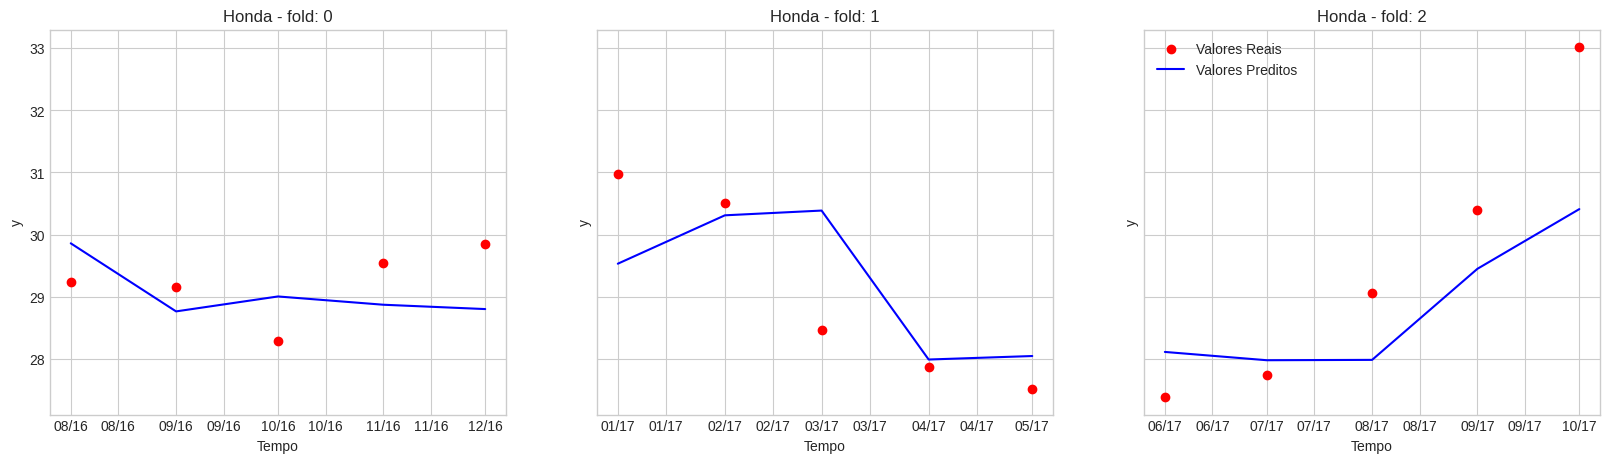

Erros no último Fold


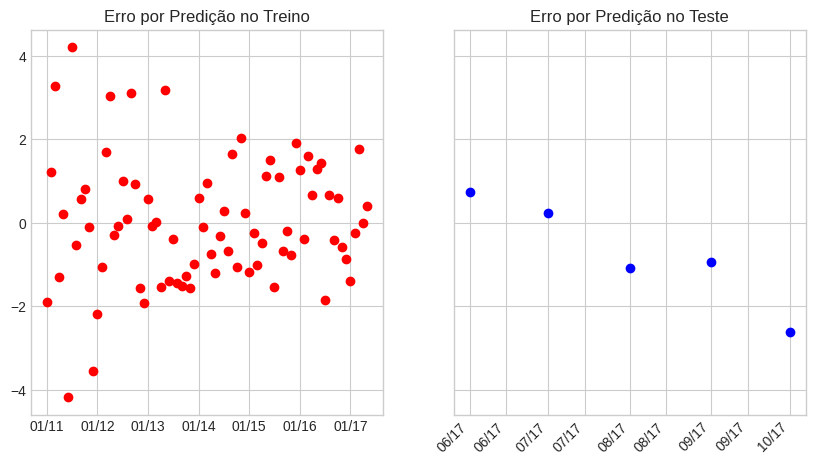

--- Report Honda ---
 r2 médio: 0.013849749981703815
 MAE médio: 0.8818239425199542


     r2 [-0.891719269068636, 0.3844549819158948, 0.5488135370978526]
     MAE [0.6887154202138511, 0.8389400924519912, 1.1178163148940201]




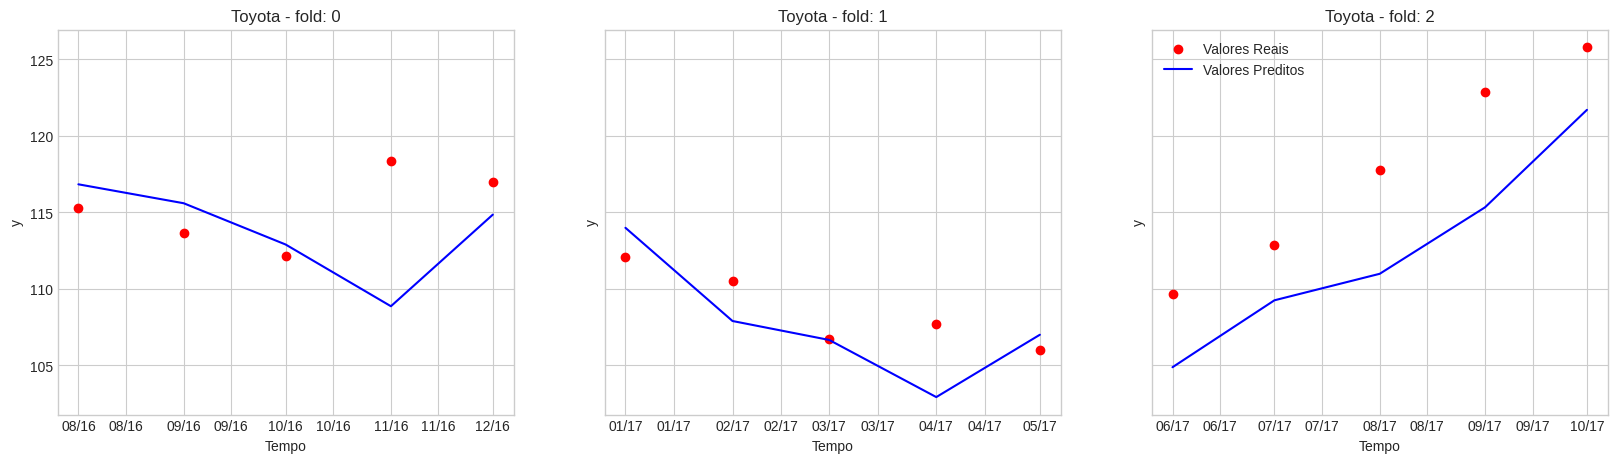

Erros no último Fold


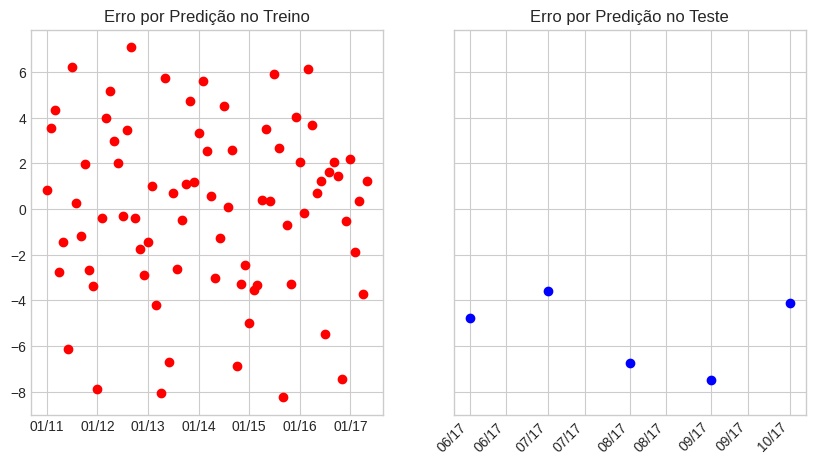

--- Report Toyota ---
 r2 médio: -1.0661950957115265
 MAE médio: 3.5322121688779107


     r2 [-3.065821734278135, -0.27391503649111204, 0.14115148363466745]
     MAE [3.1675757550652834, 2.0792874386588807, 5.3497733129095675]




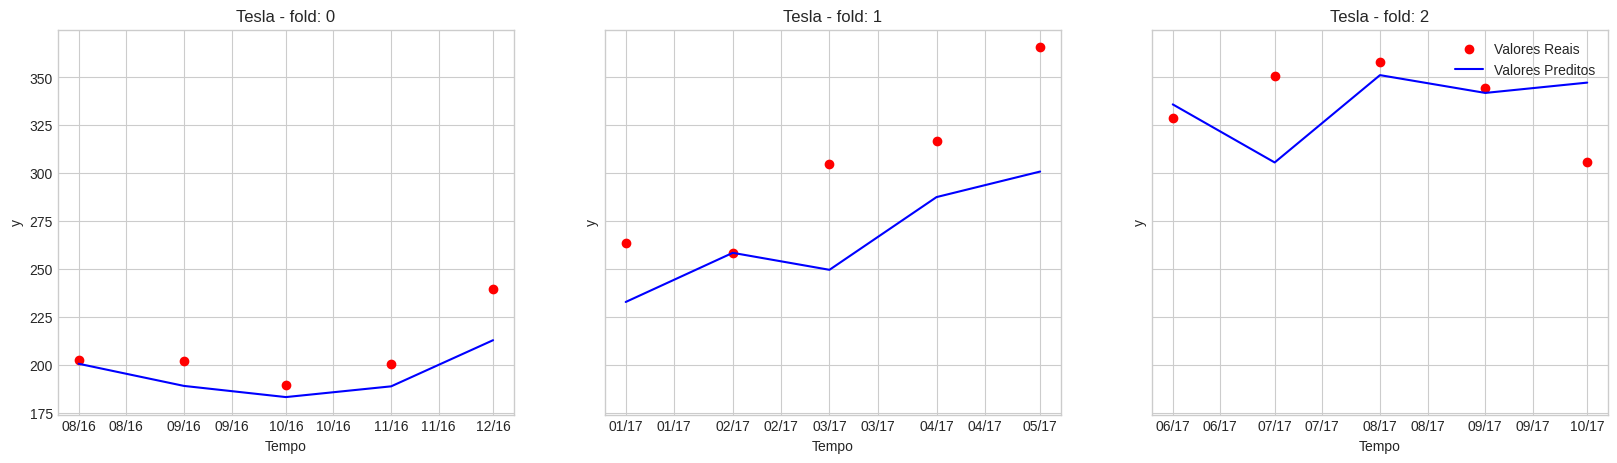

Erros no último Fold


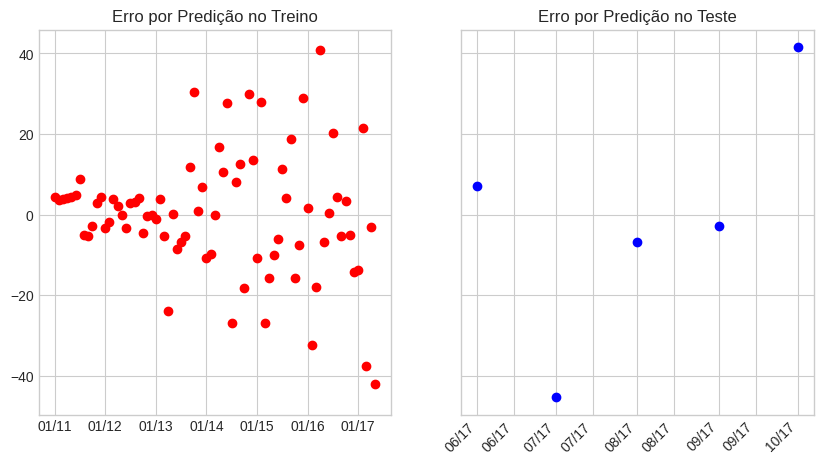

--- Report Tesla ---
 r2 médio: -0.381653701606483
 MAE médio: 22.86241290281917


     r2 [0.27912989341726735, -0.18219959044035394, -1.2418914077963623]
     MAE [11.804427434987446, 36.09154758664425, 20.691263686825813]




In [ ]:
y_name = 'y'
date_format = "%m/%y"

r2_total = []
mae_total = []

i = 0
empresas = ["Ford", "General Motors", "Honda", "Toyota", "Tesla"]

for df_emp in dfs: # para cada empresa
    r2_emp = []
    mae_emp = []
    fig, axs = plt.subplots(1, folds, sharey=True, figsize = (20, 5))
    #axs = [ax1, ax2, ax3, ax4, ax5]
    for fold_i in range(folds):
        train_index = Trains_index[fold_i]
        test_index = Tests_index[fold_i]


        X_treino = df_emp.iloc[train_index].drop(y_name, axis = 1)
        X_test = df_emp.iloc[test_index].drop(y_name, axis = 1)

        y_treino = df_emp.iloc[train_index][y_name]
        y_test = df_emp.iloc[test_index][y_name]

        #Regress]ao linear
        lr = LinearRegression()

        lr.fit(X_treino, y_treino)

        y_pred = lr.predict(X_test.to_numpy())

        R2 = r2_score(y_test, y_pred)
        MAE = mean_absolute_error(y_test, y_pred)

        r2_emp.append(R2)
        mae_emp.append(MAE)

        axx = axs[fold_i]
        axx.scatter(X_test.index, y_test.to_numpy(), color = 'red',label = "Valores Reais")#Valores Reais em vermelho
        axx.plot(X_test.index, y_pred, color = 'blue', label="Valores Preditos")#Valores Preditos em azul
        axx.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter(date_format))
        axx.set_xlabel('Tempo')
        axx.set_ylabel('y')
        axx.set_title(f'{empresas[i]} - fold: {fold_i}')

        if fold_i == folds-1:
            axx.legend()
    plt.show()

    print("Erros no último Fold")
    # Plotando os erros por intervalo
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (10, 5))

    ax1.scatter(X_treino.index, lr.predict(X_treino) - y_treino.to_numpy(), color = 'red',  label = "Treino")
    ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter(date_format))
    ax1.set_title( "Erro por Predição no Treino")

    ax2.scatter(X_test.index, y_pred - y_test.to_numpy(), color = 'blue', label = "Teste")
    ax2.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter(date_format))
    ax2.set_title( "Erro por Predição no Teste")

    plt.xticks(rotation=45, ha='right')
    plt.show()

    print(f"--- Report {empresas[i]} ---")
    print(" r2 médio:", sum(r2_emp)/folds)
    print(" MAE médio:", sum(mae_emp)/folds)
    print("\n")
    print("     r2", r2_emp)
    print("     MAE", mae_emp)
    r2_total.append(r2_emp)
    mae_total.append(mae_emp)



    i += 1 #avançando nas empresas
    print("\n")

Podemos notar que, apesar de que *Regressão Linear* não ser um modelo feito para séries temporais, ele é um modelo que usa todos os nossos dados de enriquecimento, o que singifica que apesar de não ser um modelo de *Séries Temporais*, se usarmos ele a cada fold, teremos uma predição razoável do possível valor do "Close" de várias empresas, como demonstrado pelo **r2** positivo em algumas empresas

## Modelos de Séries Temporais

- [Previsão de Séries Temporais](https://www.tensorflow.org/tutorials/structured_data/time_series?hl=pt-br)

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
ford = gp_df.get_group("Ford")["Close"]
ford_diff = ford.diff() #função que diferencia
ford_diff=ford_diff.dropna()#não funciona se tem valores NaN então usamos .dropna() para removelos

# Honda já é considerado estacionário
honda_diff = gp_df.get_group("Honda")["Close"]

toyota = gp_df.get_group("Toyota")["Close"]
toyota_diff = toyota.diff() #função que diferencia
toyota_diff=toyota_diff.dropna()#não funciona se tem valores NaN então usamos .dropna() para removelos

gm = gp_df.get_group("General Motors")["Close"]
gm_diff = gm.diff() #função que diferencia
gm_diff=gm_diff.dropna()#não funciona se tem valores NaN então usamos .dropna() para removelos

tesla = gp_df.get_group("Tesla")["Close"]
tesla_diff = tesla.diff() #função que diferencia
tesla_diff=tesla_diff.dropna()#não funciona se tem valores NaN então usamos .dropna() para removelos

In [ ]:
dfs_estacionario = [ford_diff, gm_diff, honda_diff, toyota_diff, tesla_diff]
len(dfs_estacionario)

5

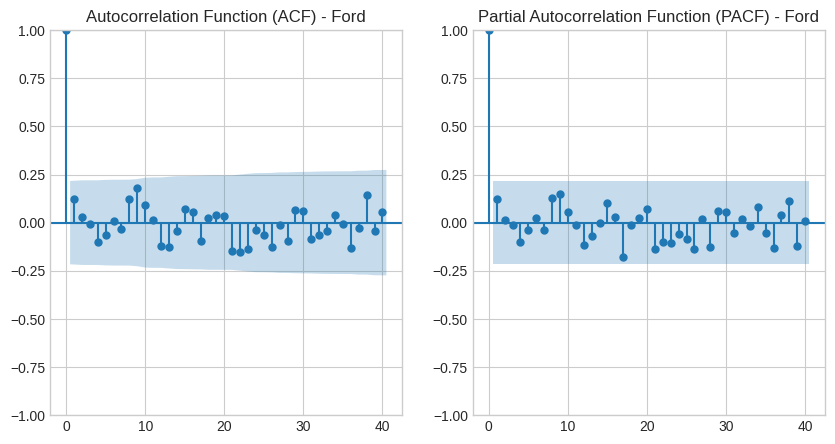

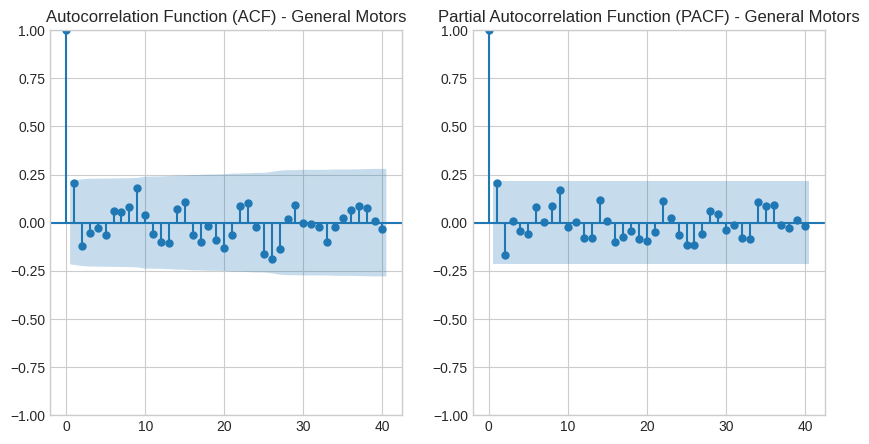

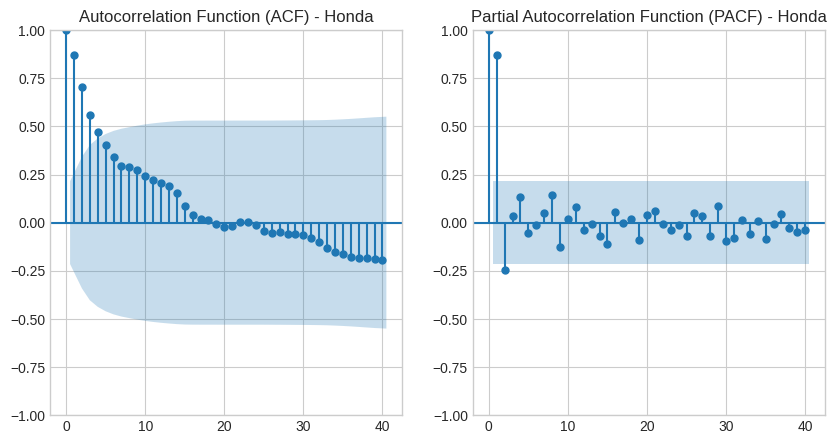

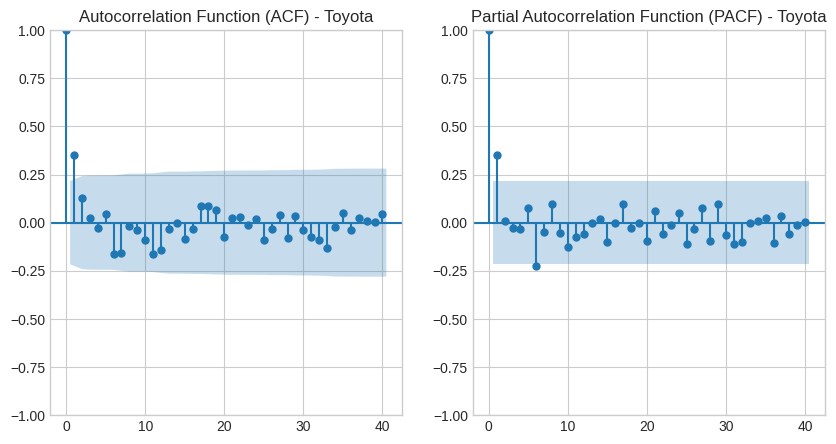

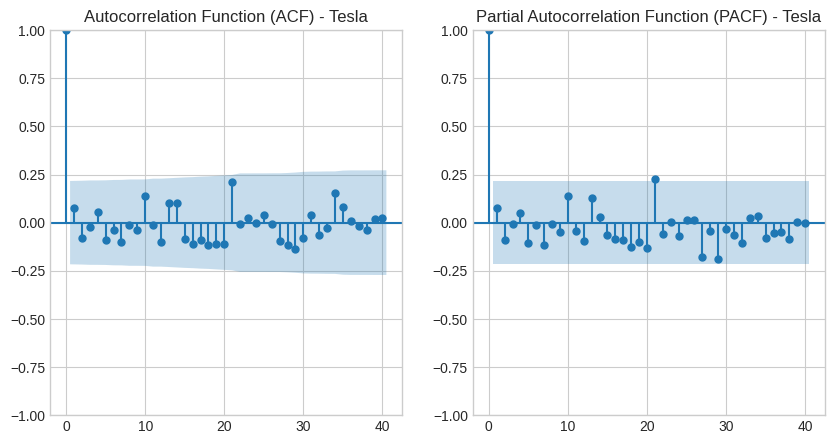

In [ ]:
for emp in range(len(empresas)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
    df = dfs_estacionario[emp]
    plot_acf(df, lags=40, ax=ax1, title = f'Autocorrelation Function (ACF) - {empresas[emp]}')

    # Plot do gráfico PACF
    plot_pacf(df, lags=40, ax=ax2, title = f'Partial Autocorrelation Function (PACF) - {empresas[emp]}')
    plt.show()
    print("\n")


Similar aos gráficos de autocorrelação, temos aqui os gráficos de autocorrelação parcial. Precisamos deles pois são eles que nos ajudam a encontrar os parâmetros para o nosso modelo *ARIMA* e *sARIMA*

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
# Supondo que df é o seu DataFrame
# Certifique-se de que 'date' é do tipo datetime e definido como índice

# Selecionando apenas as colunas relevantes
df_sarima = dfs[0][["Close"]] # PARA FORD

# Especificando os valores possíveis para os parâmetros
p_values = [1, 2]
d_values = [1]
q_values = [1, 2]
P_values = [1, 2]
D_values = [1]
Q_values = [1, 2]
S_values = [12]  # Por exemplo, para dados mensais com sazonalidade anual

# Inicializando os melhores resultados e os melhores parâmetros
best_rmse = float('inf')
best_params = None

# Iterando sobre as combinações de parâmetros
for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        for S in S_values:
                            order = (p, d, q)
                            seasonal_order = (P, D, Q, S)
                            rmse_values = []

                            # Implementando Walk-Forward Validation
                            for i in range(len(Trains_index)):
                                train = df_sarima.iloc[Trains_index[i], :]
                                test = df_sarima.iloc[Tests_index[i], :]

                                model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
                                #model.fit()
                                results = model.fit()

                                predictions = results.forecast(steps=len(test))
                                rmse = sqrt(mean_squared_error(test, predictions))
                                rmse_values.append(rmse)

                            # Calculando a média do RMSE

                            avg_rmse = sum(rmse_values) / len(rmse_values)

                            # Atualizando os melhores resultados e os melhores parâmetros
                            if avg_rmse < best_rmse:
                                best_rmse = avg_rmse
                                best_params = (p, d, q, P, D, Q, S)

# Imprimindo os melhores parâmetros
print(f"Melhores parâmetros: {best_params}")
print(f"Melhor RMSE médio: {best_rmse}")


Melhores parâmetros: (2, 1, 2, 2, 1, 2, 12)
Melhor RMSE médio: 0.7407171942344796


In [ ]:
print("Train Idx:", Trains_index[-1],"\n", "Test Idx:", Tests_index[-1])

Train Idx: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76] 
 Test Idx: [77 78 79 80 81]


FOLD 0


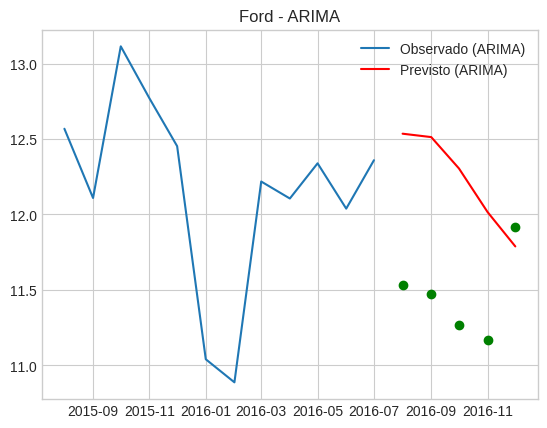

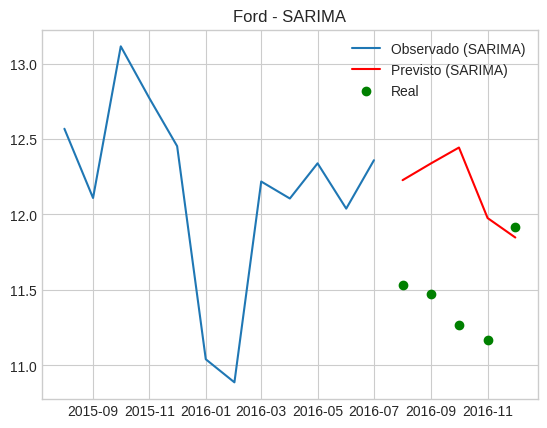

--- Report Ford ---
r2 ARIMA: -10.728860772808186 
r2 SARIMA: -8.853278252699893
MSE ARIMA: 0.7789712581512437 
MSE SARIMA: 0.6544046097993056


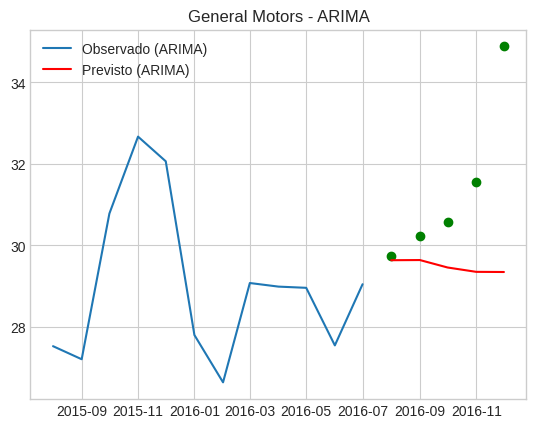

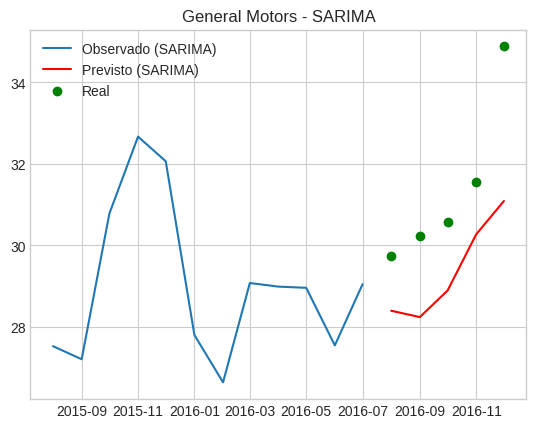

--- Report General Motors ---
r2 ARIMA: -1.187691361968494 
r2 SARIMA: -0.4530030080582903
MSE ARIMA: 7.414078346750891 
MSE SARIMA: 4.924222094160292


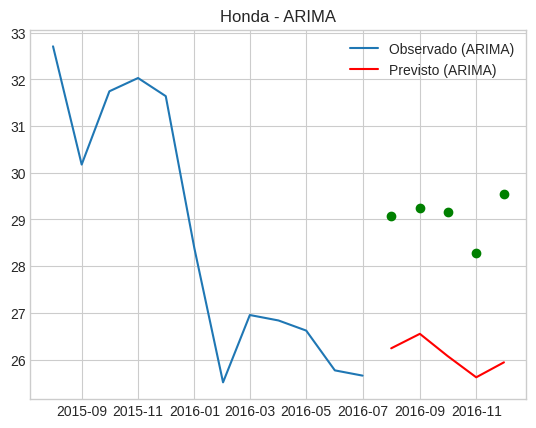

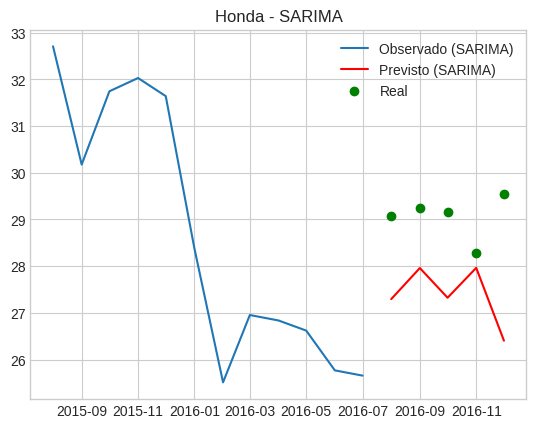

--- Report Honda ---
r2 ARIMA: -50.52304434841227 
r2 SARIMA: -19.812795673515094
MSE ARIMA: 8.964276814309745 
MSE SARIMA: 3.62113039042125


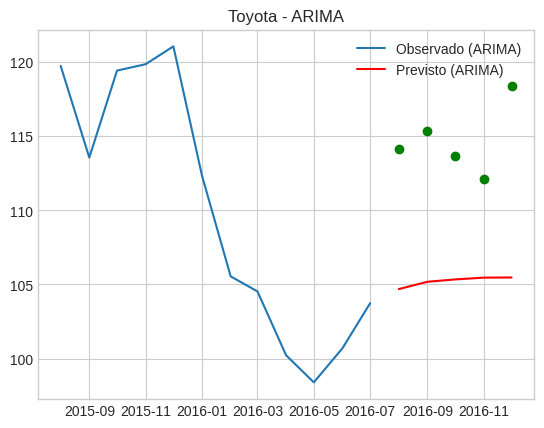

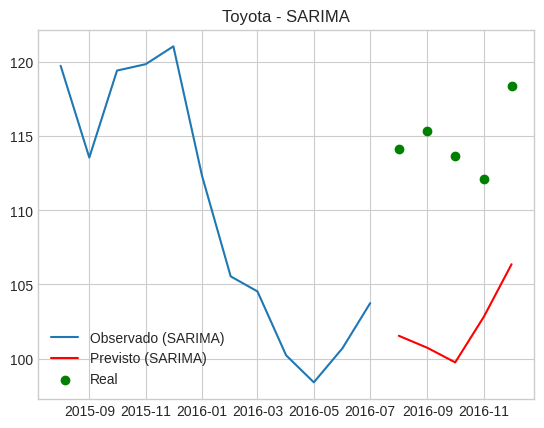

--- Report Toyota ---
r2 ARIMA: -20.788938127983755 
r2 SARIMA: -35.76702768013187
MSE ARIMA: 94.36490680116044 
MSE SARIMA: 159.23296123987765


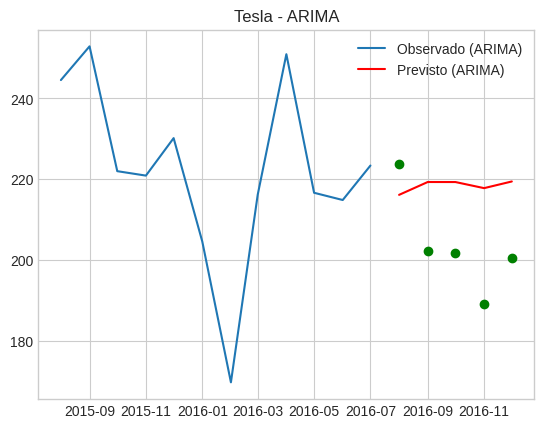

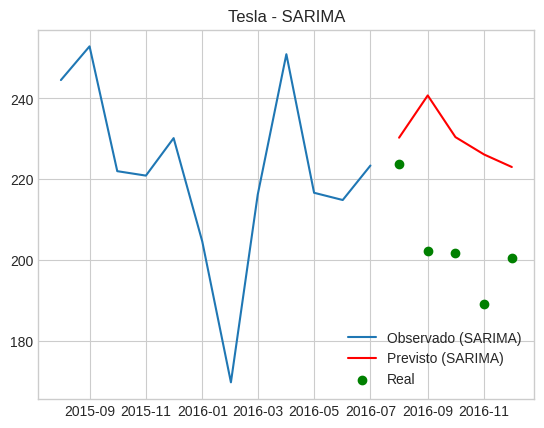

--- Report Tesla ---
r2 ARIMA: -1.91959083587515 
r2 SARIMA: -5.720007372140469
MSE ARIMA: 366.7500079334316 
MSE SARIMA: 844.1466272469927
FOLD 1


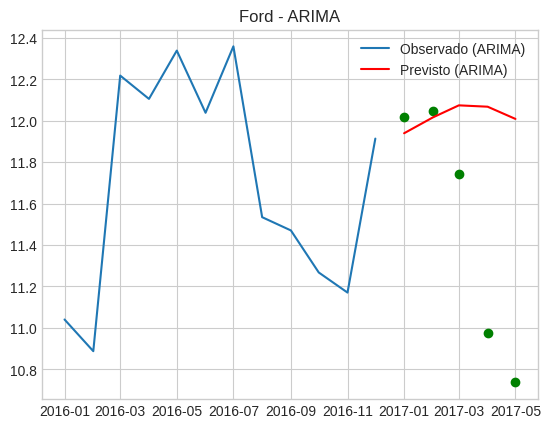

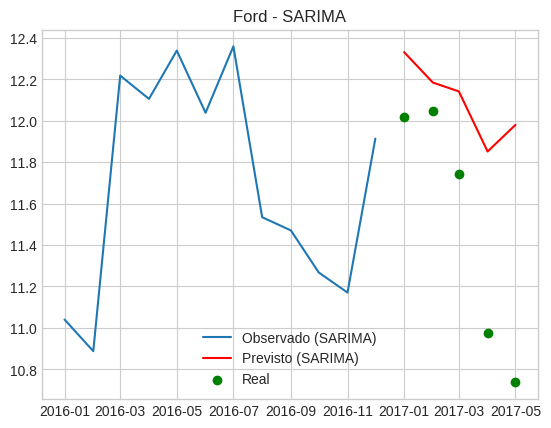

--- Report Ford ---
r2 ARIMA: -0.9813325220742763 
r2 SARIMA: -0.753540429243861
MSE ARIMA: 0.5864671786613382 
MSE SARIMA: 0.5190415524652083


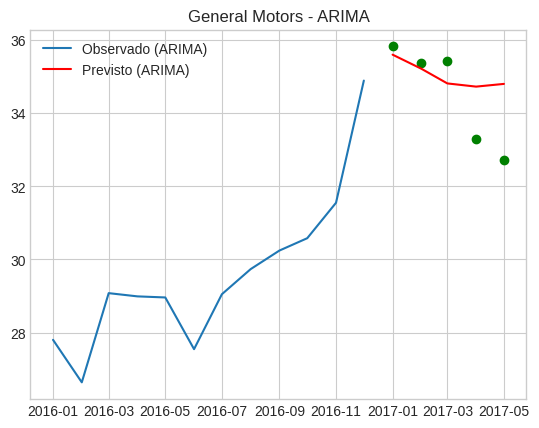

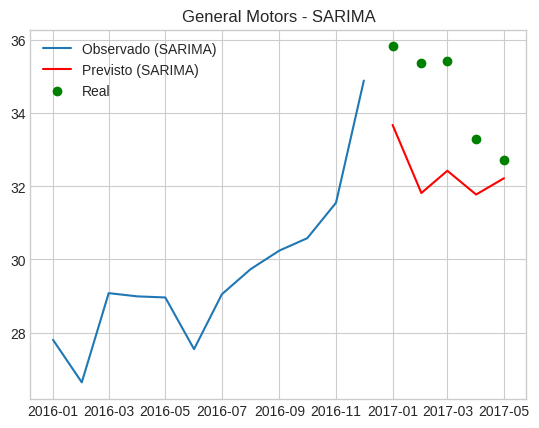

--- Report General Motors ---
r2 ARIMA: 0.1483668938116539 
r2 SARIMA: -2.6221908076923715
MSE ARIMA: 1.3569112047595246 
MSE SARIMA: 5.771254378229559


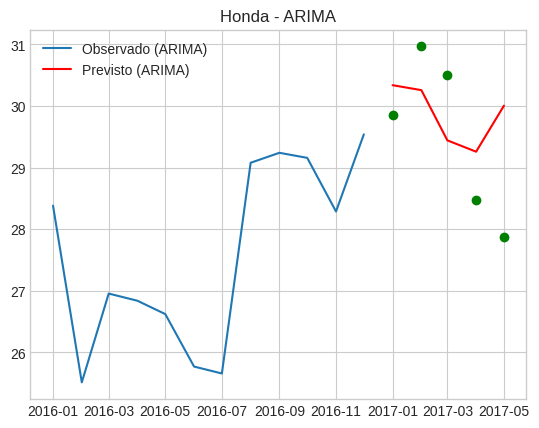

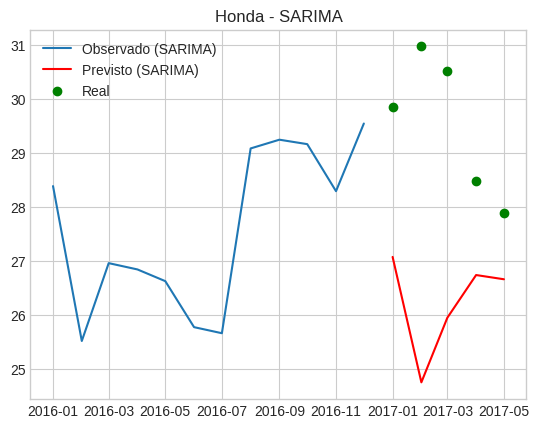

--- Report Honda ---
r2 ARIMA: -0.006666478610906745 
r2 SARIMA: -9.273258499050065
MSE ARIMA: 1.40604540797339 
MSE SARIMA: 14.349010565490428


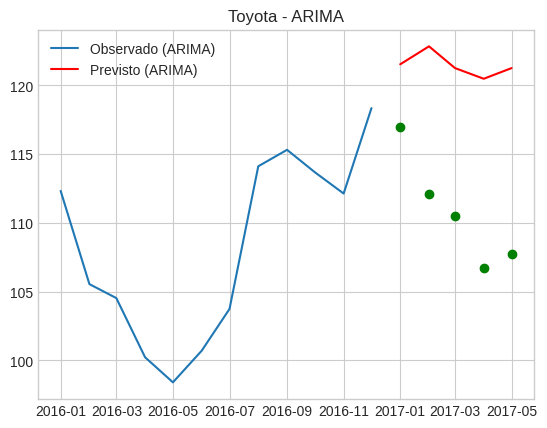

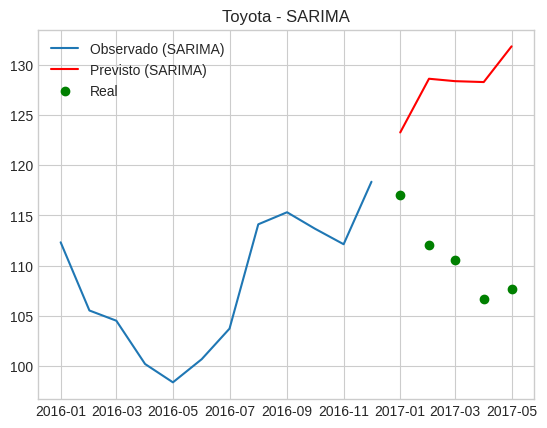

--- Report Toyota ---
r2 ARIMA: -8.40601531085409 
r2 SARIMA: -24.220602693983462
MSE ARIMA: 124.93975658440789 
MSE SARIMA: 335.0043410903434


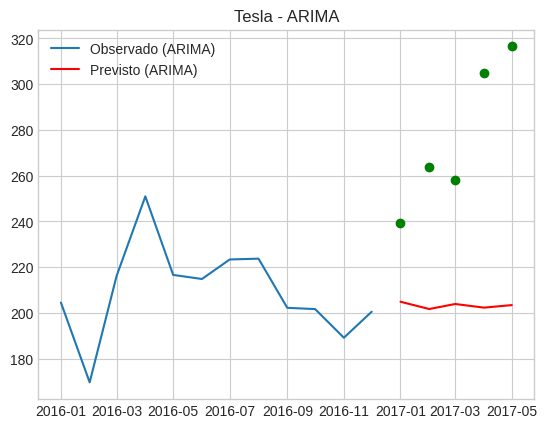

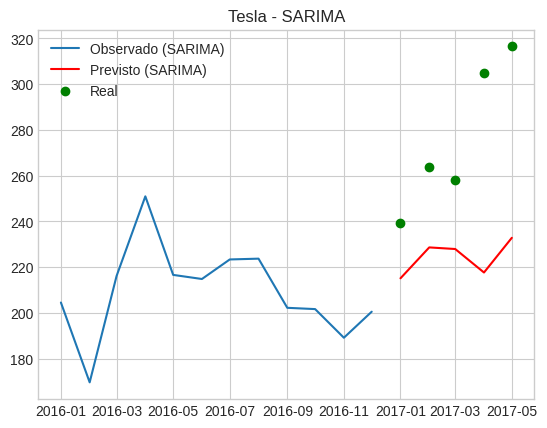

--- Report Tesla ---
r2 ARIMA: -6.297703216591453 
r2 SARIMA: -3.0428157537999025
MSE ARIMA: 6250.393891311918 
MSE SARIMA: 3462.62243630305
FOLD 2


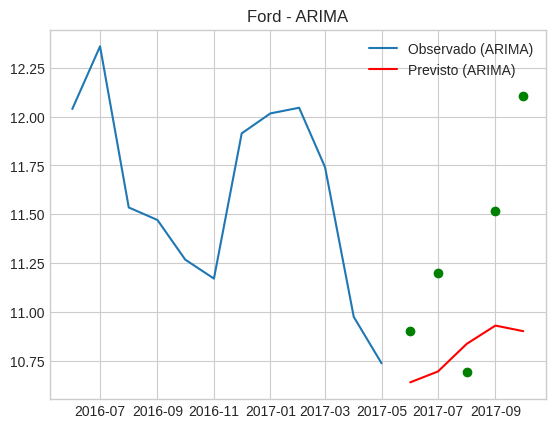

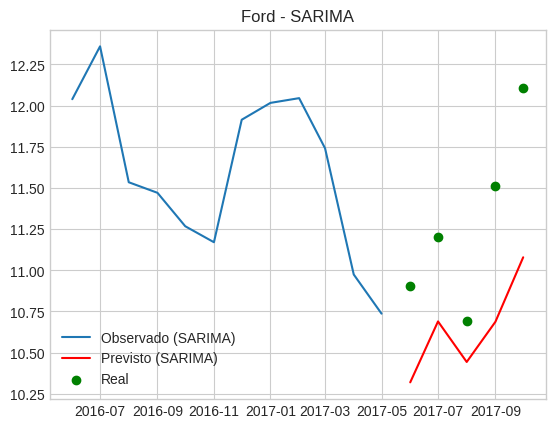

--- Report Ford ---
r2 ARIMA: -0.7308114180183409 
r2 SARIMA: -0.9407327786684407
MSE ARIMA: 0.42799762338593333 
MSE SARIMA: 0.4799072898700216


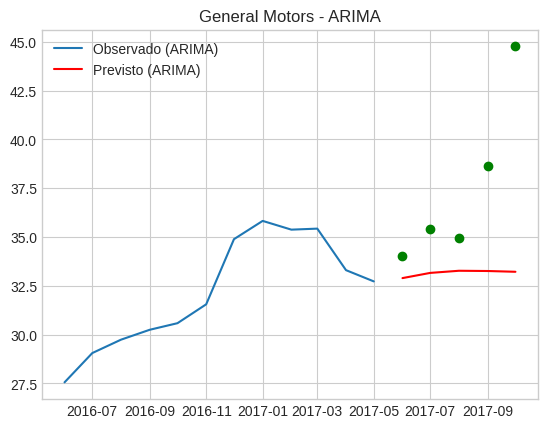

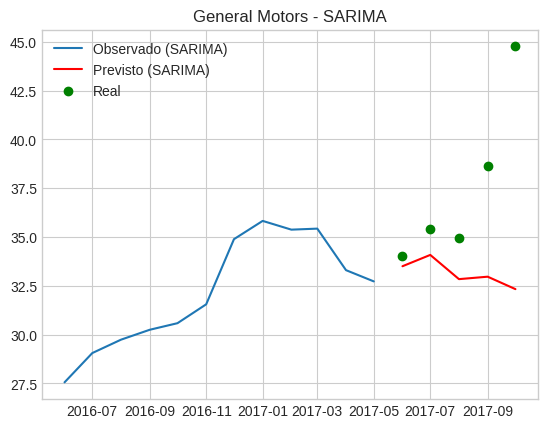

--- Report General Motors ---
r2 ARIMA: -1.2278656433464463 
r2 SARIMA: -1.512083999037427
MSE ARIMA: 34.329059914856316 
MSE SARIMA: 38.708565021260235


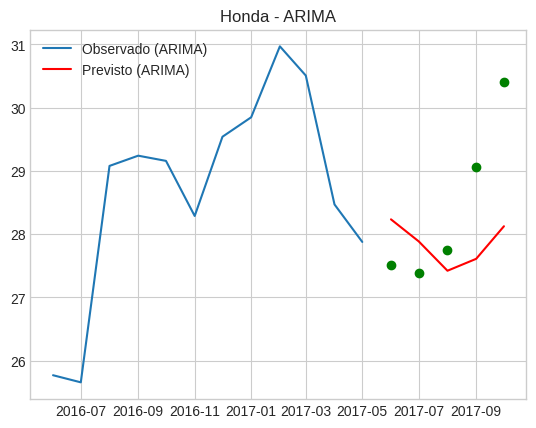

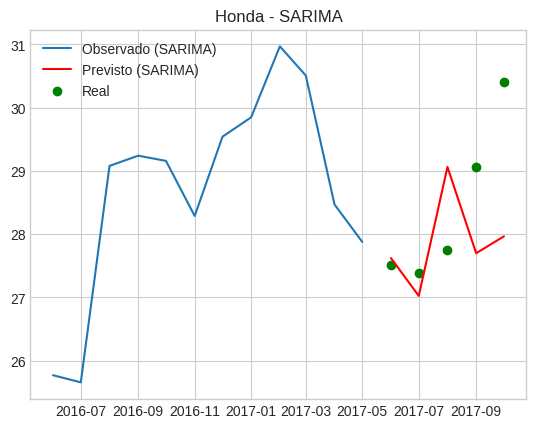

--- Report Honda ---
r2 ARIMA: -0.22288862775057838 
r2 SARIMA: -0.44862438389846293
MSE ARIMA: 1.6299370138209999 
MSE SARIMA: 1.9308107450332201


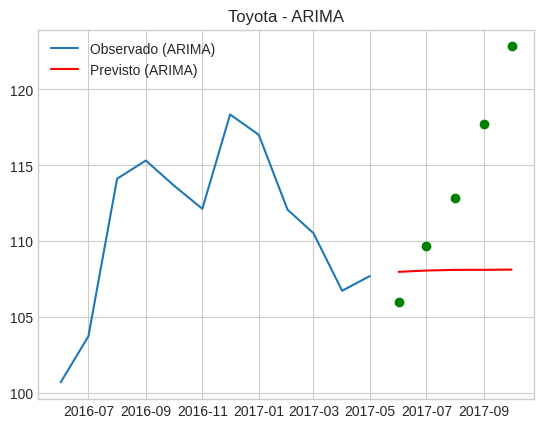

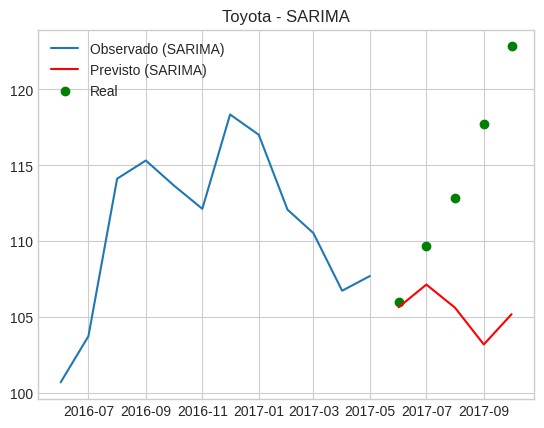

--- Report Toyota ---
r2 ARIMA: -0.9180092875789299 
r2 SARIMA: -2.301385531818173
MSE ARIMA: 67.70741753743604 
MSE SARIMA: 116.54181765564822


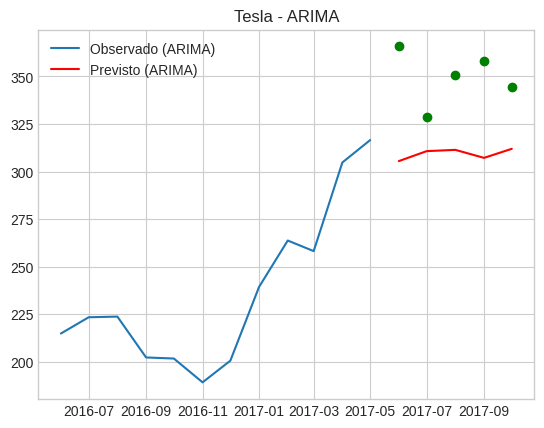

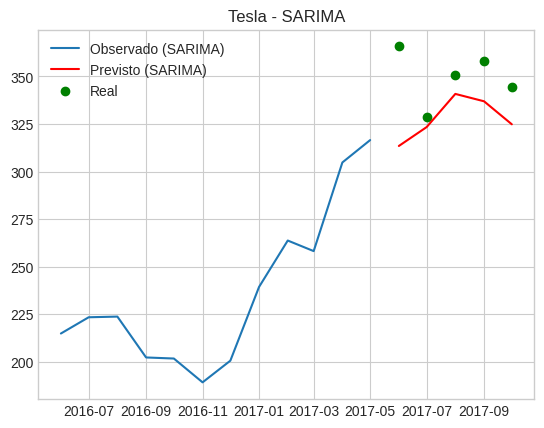

--- Report Tesla ---
r2 ARIMA: -10.615400751158722 
r2 SARIMA: -3.6978028355887904
MSE ARIMA: 1833.3359104577394 
MSE SARIMA: 741.4854487802282


In [ ]:
for fold in range(folds):
    print(f"FOLD {fold}")
    for id_emp in range(len(empresas)):
        df_sarima = dfs[id_emp][["Close"]].copy()
        train = df_sarima.iloc[Trains_index[fold], :]
        test = df_sarima.iloc[Tests_index[fold], :]

        # Modelo ARIMA
        order = (2, 1, 2)  # Substitua p, d, q pelos valores adequados
        model_arima = ARIMA(train, order=order)
        results_arima = model_arima.fit()

        # Fazendo previsões com o modelo ARIMA
        forecast_arima = results_arima.get_forecast(steps=len(test))
        pred_mean_arima = forecast_arima.predicted_mean

        # Visualizando os resultados
        meses_plot = 12
        plt.plot(train.index[-meses_plot:], train[-meses_plot:], label='Observado (ARIMA)')
        plt.plot(test.index, pred_mean_arima, label='Previsto (ARIMA)', color='red')
        plt.legend()
        plt.scatter(test.index, test, label = "Real", color = 'green')
        plt.title(f"{empresas[id_emp]} - ARIMA")
        plt.show()

        # Modelo SARIMA
        order_sarima = (2, 1, 2)  # Substitua p, d, q, s pelos valores adequados
        model_sarima = SARIMAX(train, order=order_sarima, seasonal_order=(2, 1, 2, 12))  # Substitua P, D, Q, S pelos valores adequados
        results_sarima = model_sarima.fit()

        # Fazendo previsões com o modelo SARIMA
        forecast_sarima = results_sarima.get_forecast(steps=len(test))
        pred_mean_sarima = forecast_sarima.predicted_mean

        # Visualizando os resultados
        meses_plot = 12
        plt.plot(train.index[-meses_plot:], train[-meses_plot:], label='Observado (SARIMA)')
        plt.plot(test.index, pred_mean_sarima, label='Previsto (SARIMA)', color='red')
        plt.scatter(test.index, test, label = "Real", color = 'green')
        plt.title(f"{empresas[id_emp]} - SARIMA")
        plt.legend()
        plt.show()

        print(f"--- Report {empresas[id_emp]} ---")
        print("r2 ARIMA:", r2_score(test,pred_mean_arima), "\nr2 SARIMA:", r2_score(test,pred_mean_sarima))

        mean_squared_error(test,pred_mean_arima), mean_squared_error(test,pred_mean_sarima)
        print("MSE ARIMA:", mean_squared_error(test,pred_mean_arima), "\nMSE SARIMA:", mean_squared_error(test,pred_mean_sarima))

## Comparação

Para modelos como regressão Linear, podemos perceber que teve resultados relativamente bons, mas isso não significa que modelos de regressão comuns são os modelos indicados para séries temporais. Muito do desempenho decente se deve ao fato da validação cruzada para séries temporais, e não devido a superioridade de modelos de regressão nesse contexto.

Comparando os resultados dos modelos ARIMA e SARIMA entre os folds e marcas de carro, podemos perceber que em alguns casos os modelos parecem se sair bem.

Contudo pelas métricas r2 e MSE, podemos ver que em sua maioria não conseguimos um bom desempenho.

Como podemos perceber nos poucos casos onde o modelo parece ter se saído bem e pela grande maioria dos r2 negativos, sabemos que os erros são por falta de conhecimento dos modelos de séries temporais.

Tendo espaço para melhoria.